## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn

from sklearn.preprocessing import RobustScaler # preprocessing

from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn import base
from sklearn.model_selection import KFold

from warnings import filterwarnings
from scipy.stats import zscore
from IPython.display import Image
import pickle
%matplotlib inline

In [2]:
sns.set(style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')
filterwarnings(action = 'ignore')

## For displaying all column names

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
%matplotlib inline

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Exploratory Data Analysis process for both datasets

In [5]:
df_train.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46

In [6]:
df_test.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 79 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            890 non-null    int64  
 1   galaxy                                                                                   890 non-null    object 
 2   existence expectancy index                                                               885 non-null    float64
 3   existence expectancy at birth                                                            885 non-null    float64
 4   Gross income per capita                                                                  885 non-null    float64
 5   Income Index                                                    

In [9]:
df_train.columns

Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15–64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expect

In [10]:
df_train.shape

(3865, 80)

In [11]:
df_test.shape

(890, 79)

<AxesSubplot:>

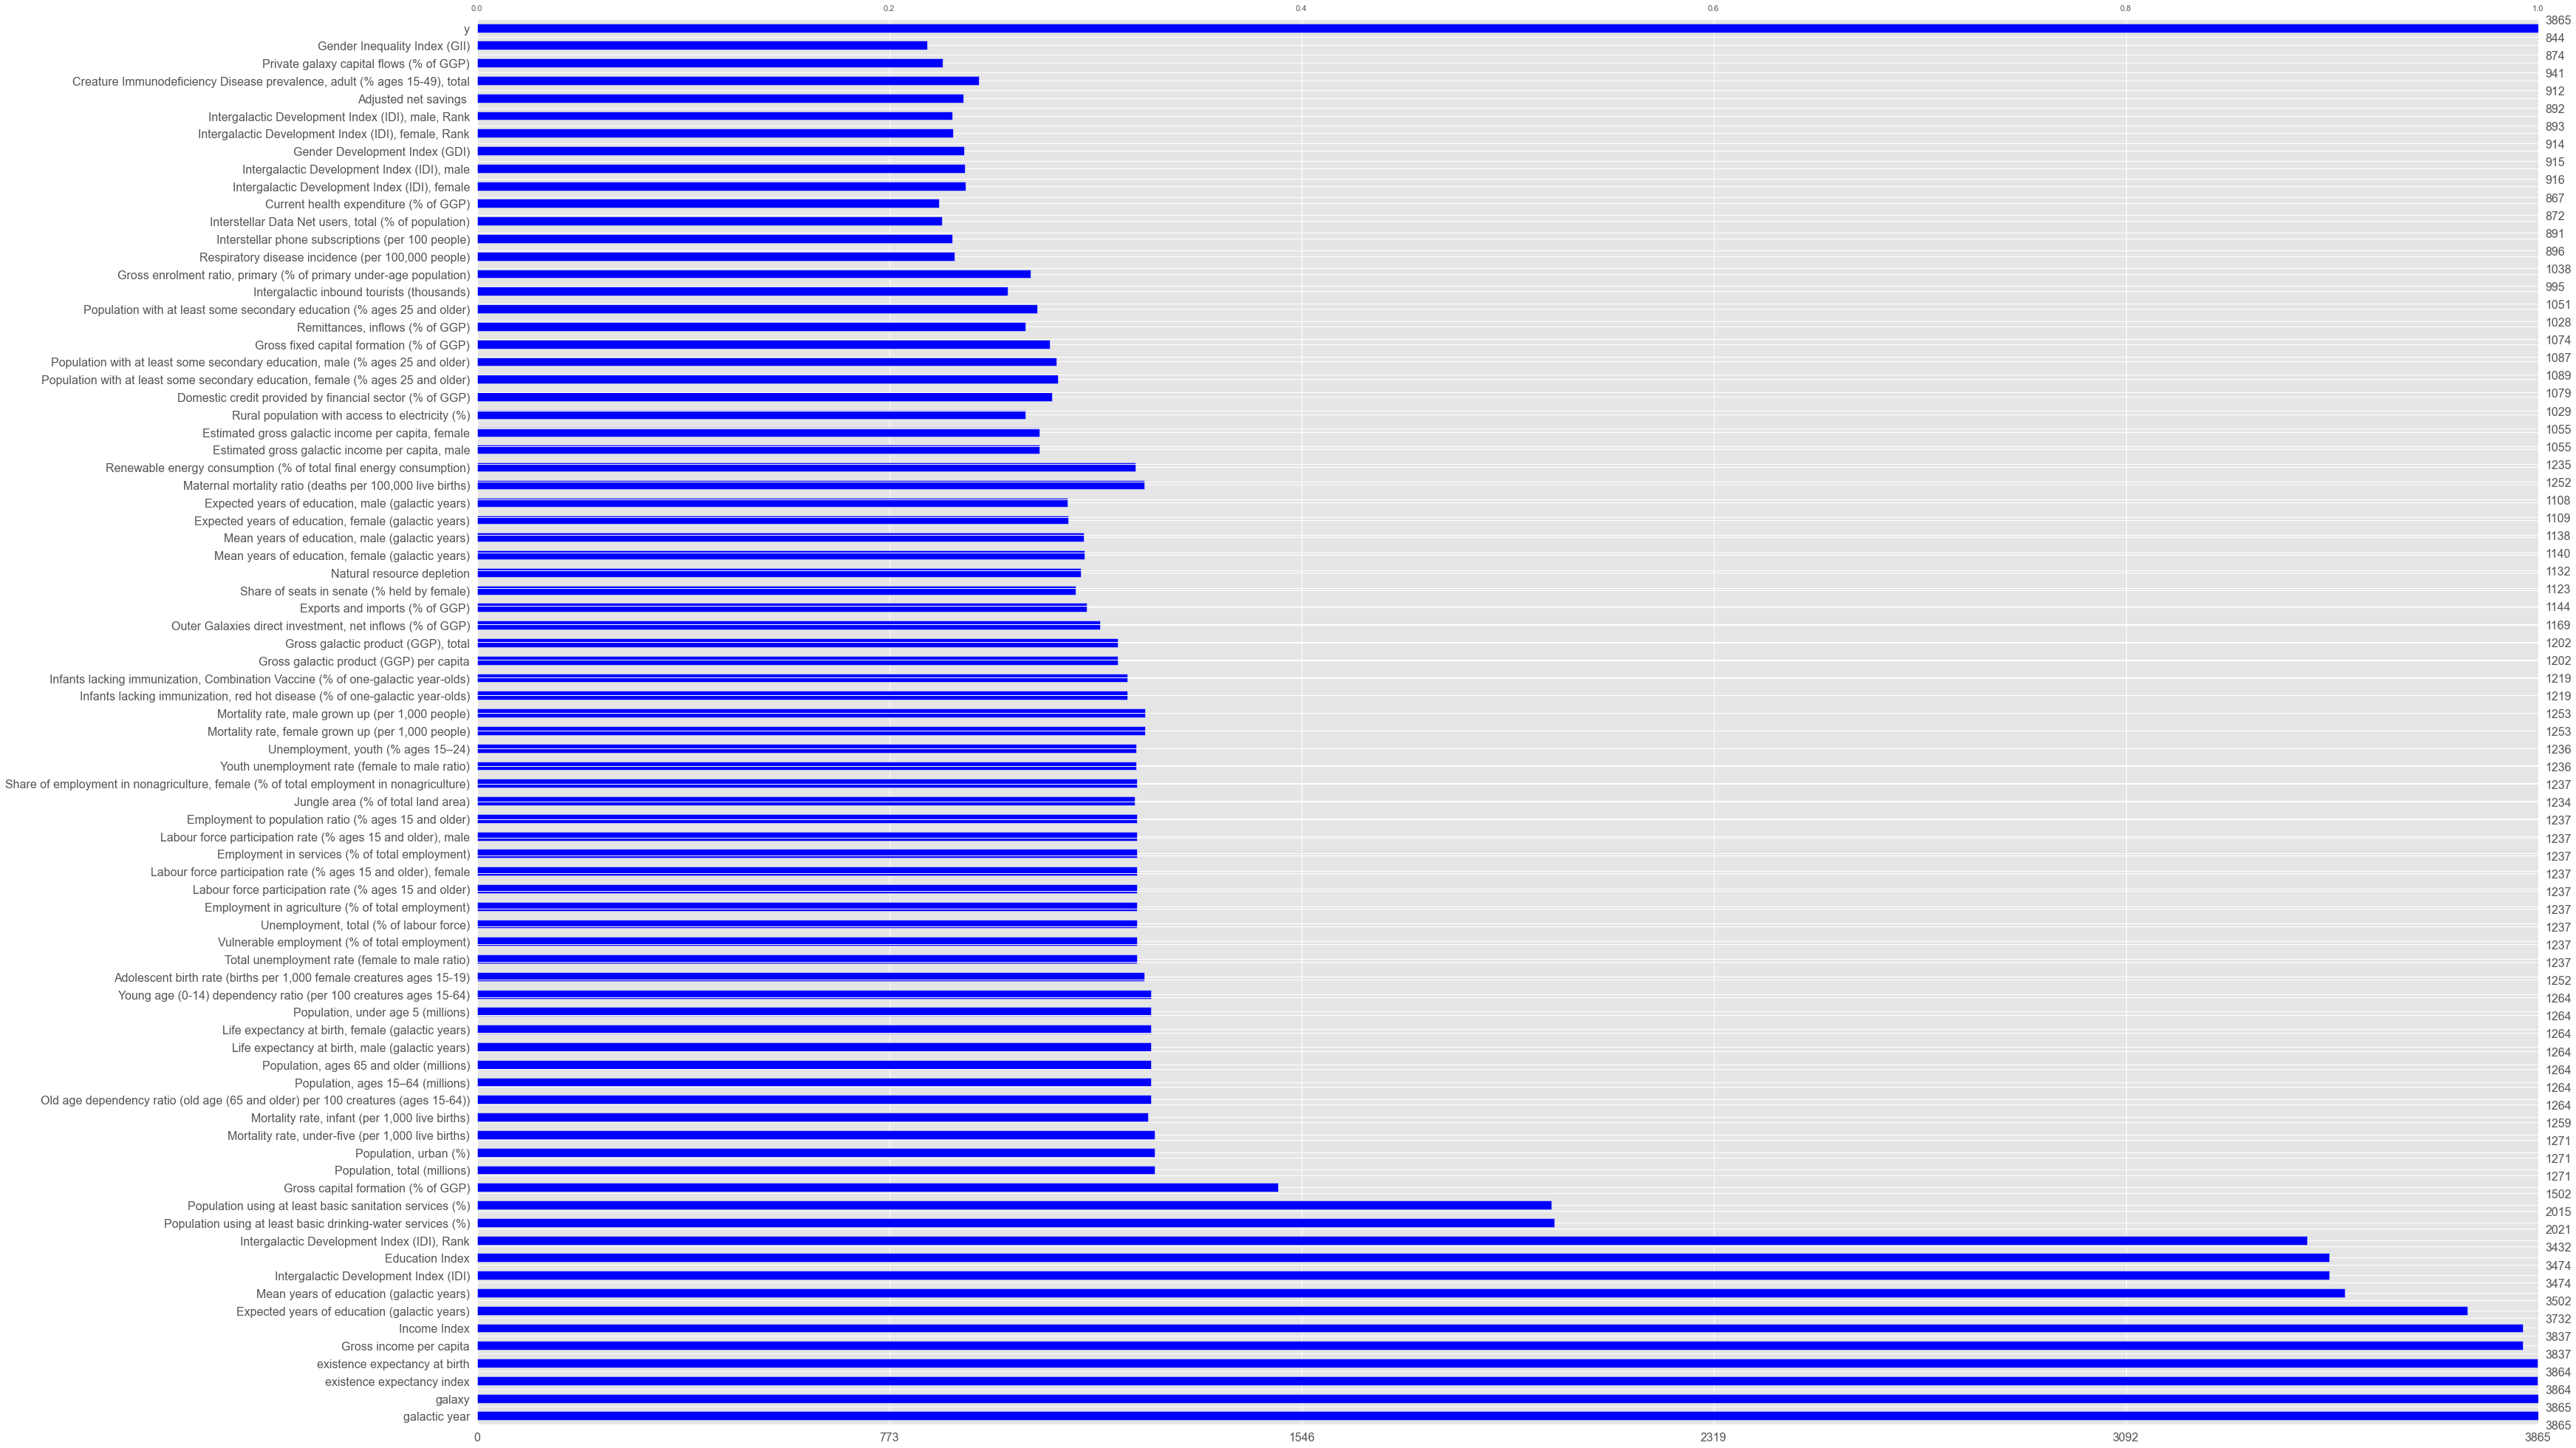

In [12]:
msn.bar(df_train, figsize=(50, 35), color='blue')

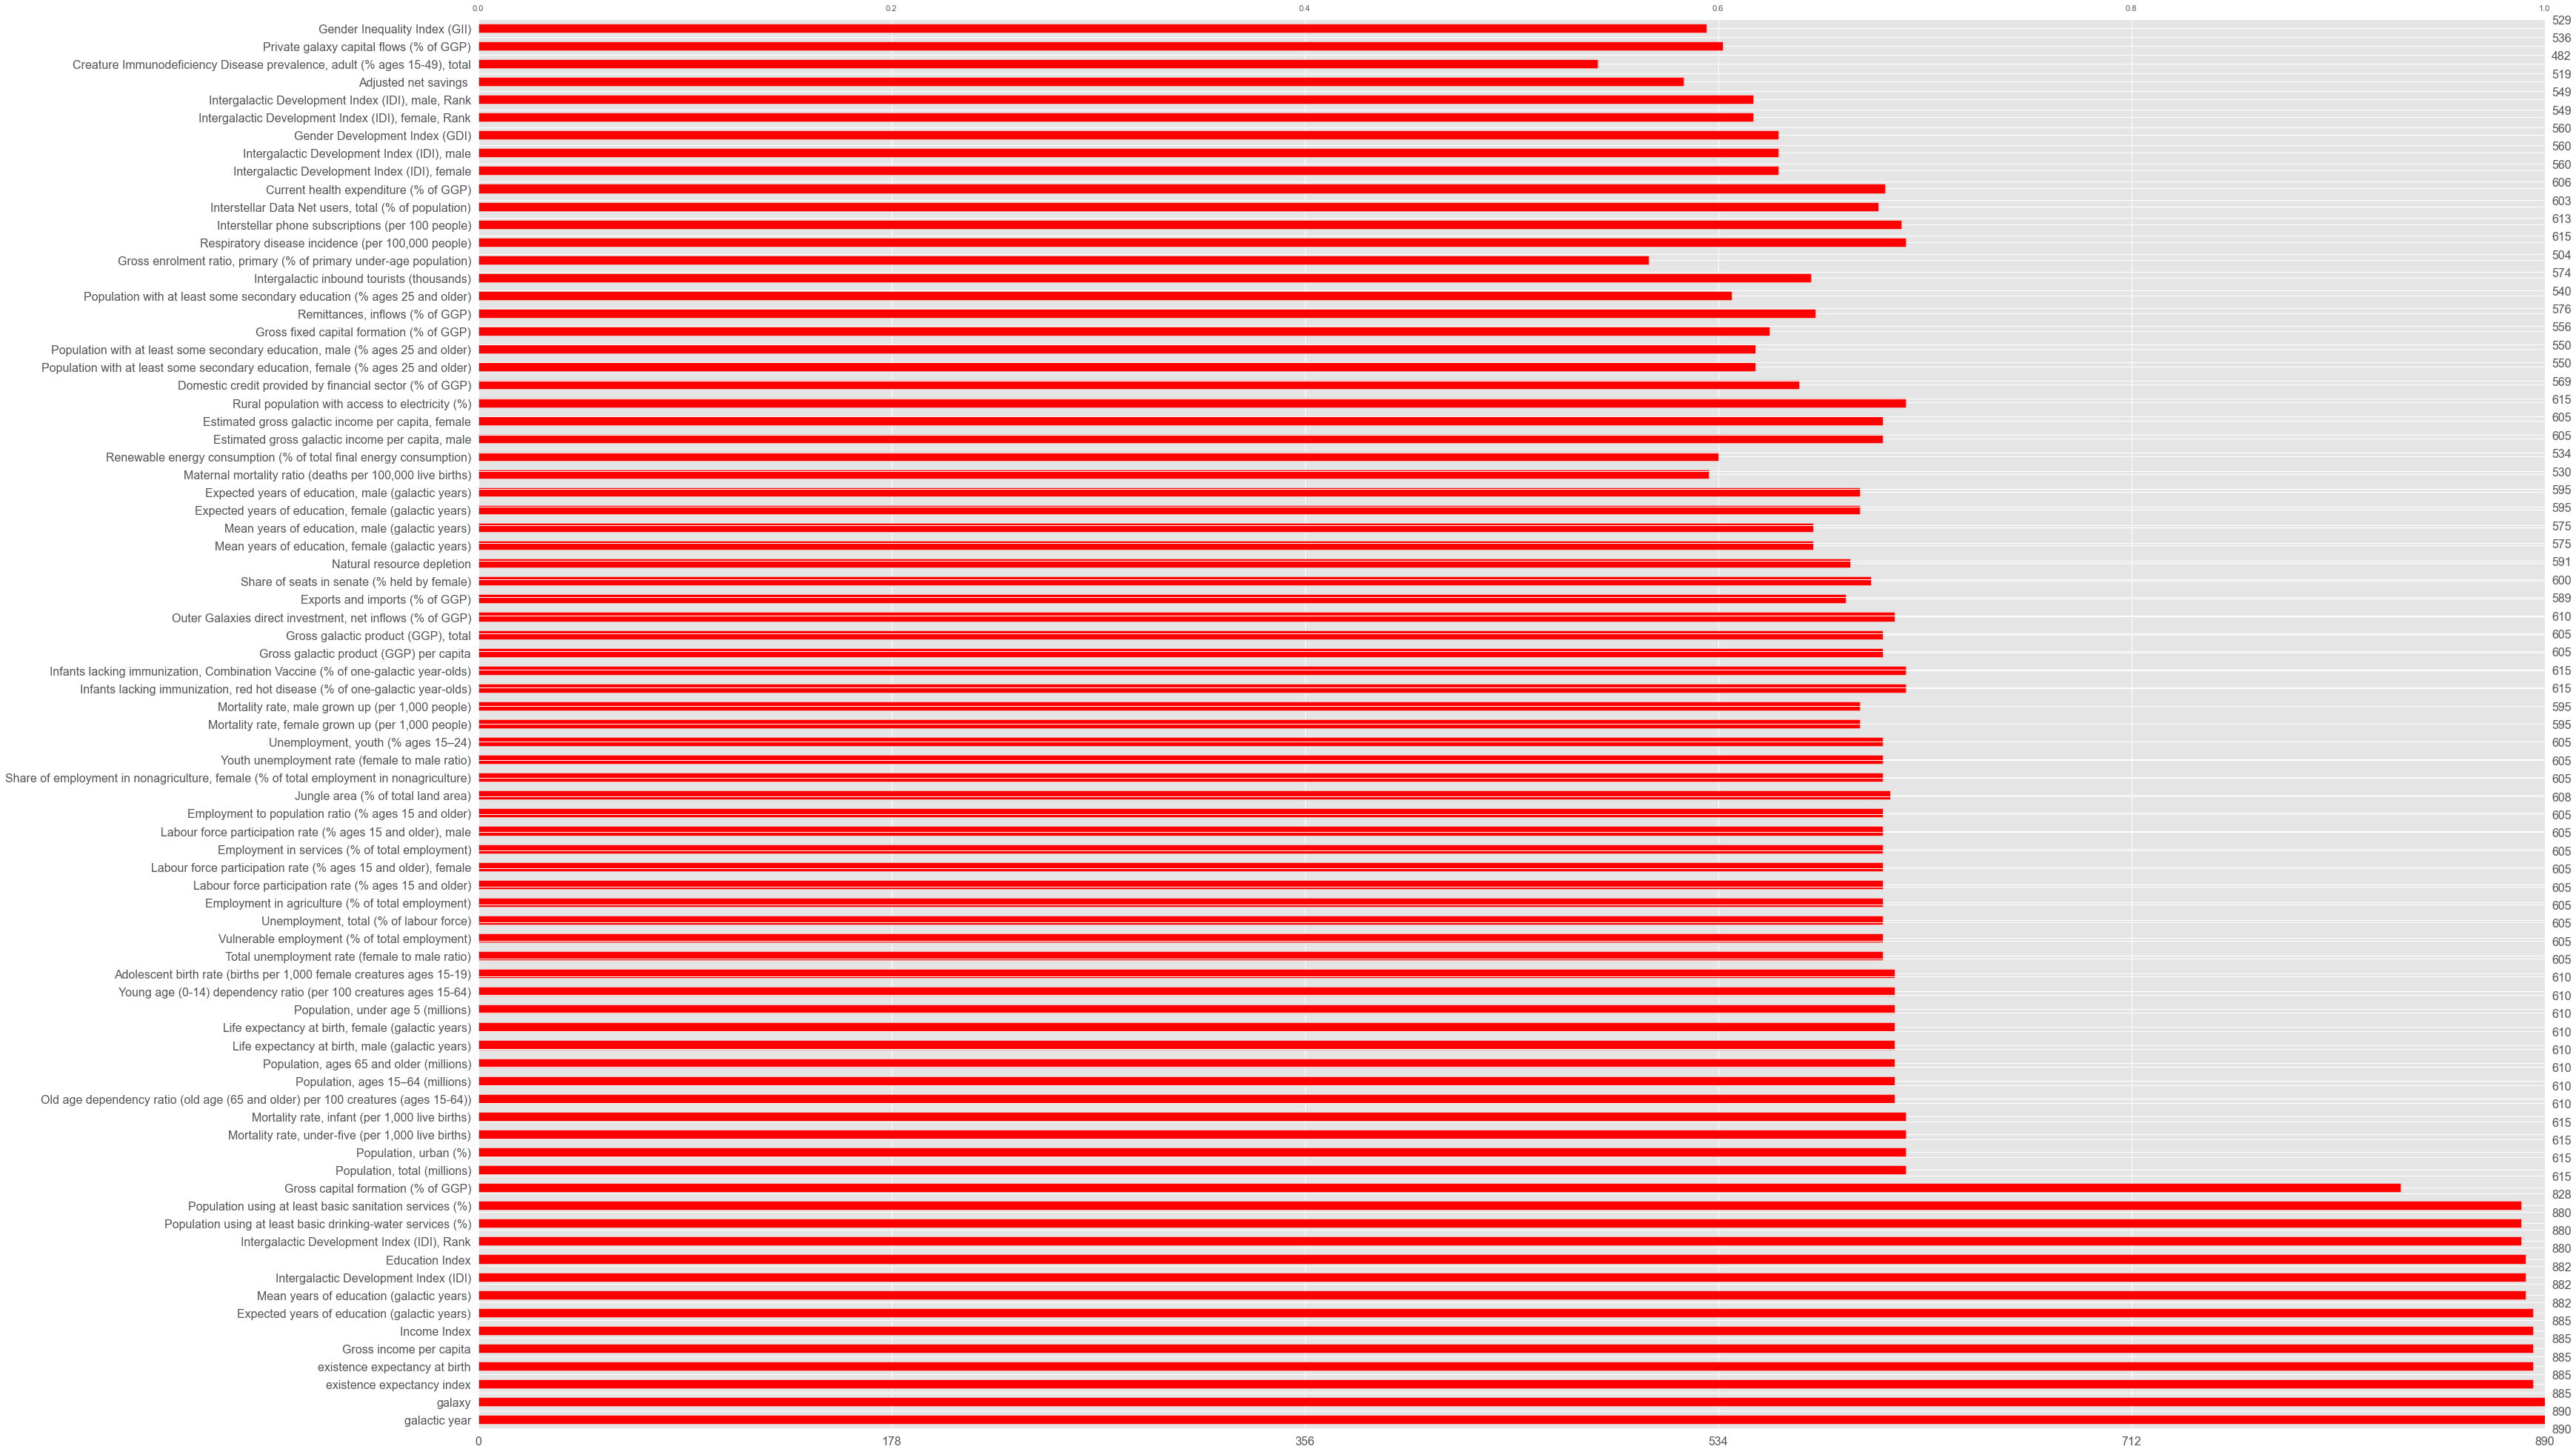

In [13]:
msn.bar(df_test,figsize=(50, 35), color='red')
plt.show()

## Checking null values with heatmap

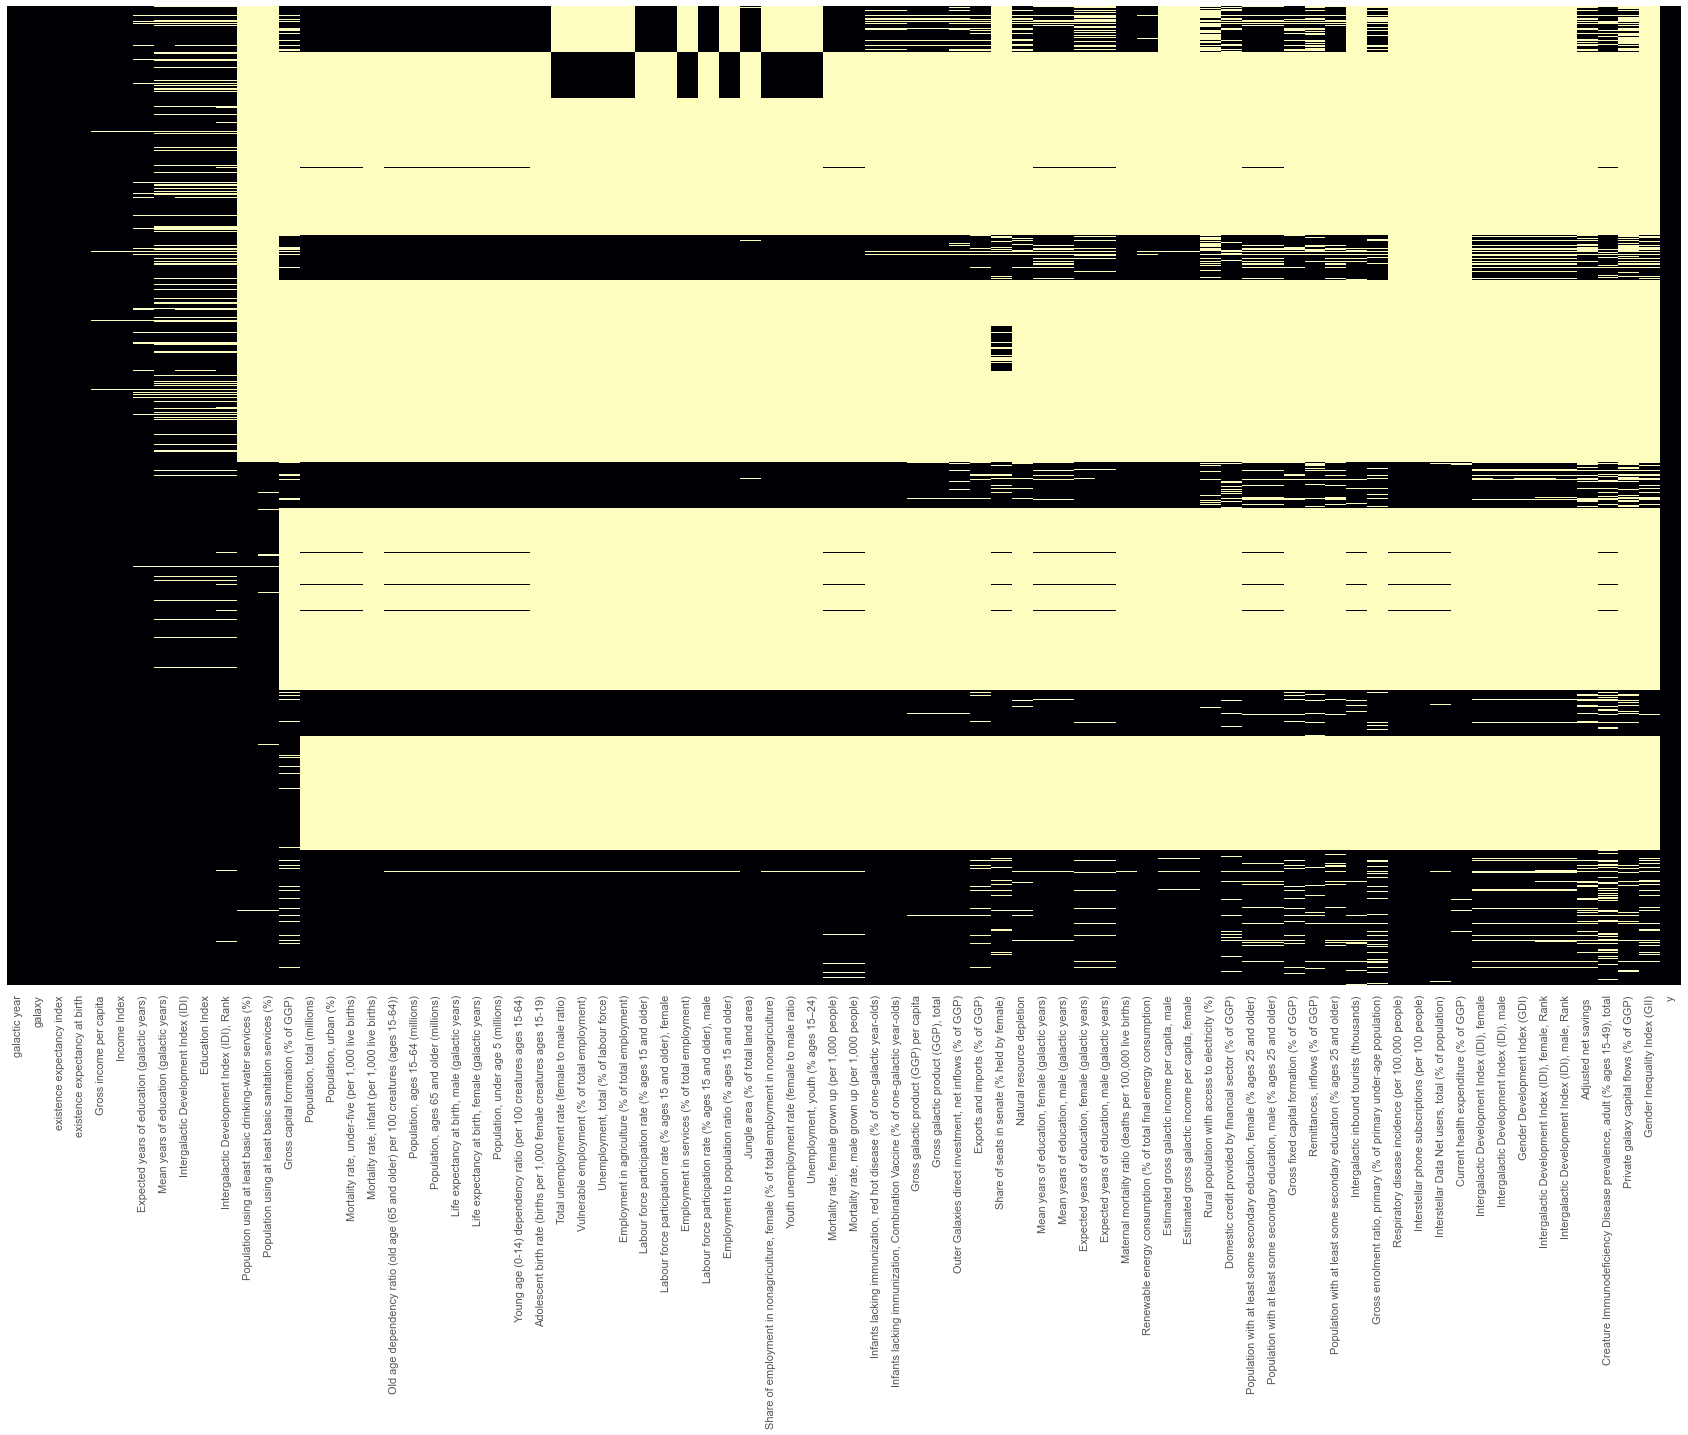

In [14]:
plt.figure(figsize = (30,18))
sns.heatmap(data = df_train.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

In [15]:
df_train['Intergalactic Development Index (IDI), female, Rank']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3860    124.564121
3861    163.664516
3862     66.498714
3863    182.249079
3864     57.204155
Name: Intergalactic Development Index (IDI), female, Rank, Length: 3865, dtype: float64

In [16]:
df_train['galaxy'].value_counts()

Andromeda XXII[57]                             26
Tucana Dwarf                                   26
Andromeda XXIV                                 26
Andromeda XIX[60]                              26
Andromeda XII                                  26
                                               ..
Sagittarius Dwarf Irregular Galaxy (SagDIG)    17
Aquarius Dwarf Galaxy (DDO 210)                17
Andromeda XXI[57]                              17
Pegasus Dwarf Irregular (DDO 216)              17
NGC 5253                                        1
Name: galaxy, Length: 181, dtype: int64

In [17]:
df_test['galaxy'].value_counts()

Pegasus Dwarf Irregular (DDO 216)              10
Andromeda XXI[57]                              10
Sagittarius Dwarf Irregular Galaxy (SagDIG)    10
Wolf-Lundmark-Melotte (WLM, DDO 221)           10
Andromeda X                                    10
                                               ..
Pisces II                                       1
Pegasus III                                     1
Canes Venatici II Dwarf                         1
Leo IV Dwarf                                    1
Boötes IV                                       1
Name: galaxy, Length: 172, dtype: int64

### Galactic year visualizaiton

<AxesSubplot:xlabel='galactic year', ylabel='count'>

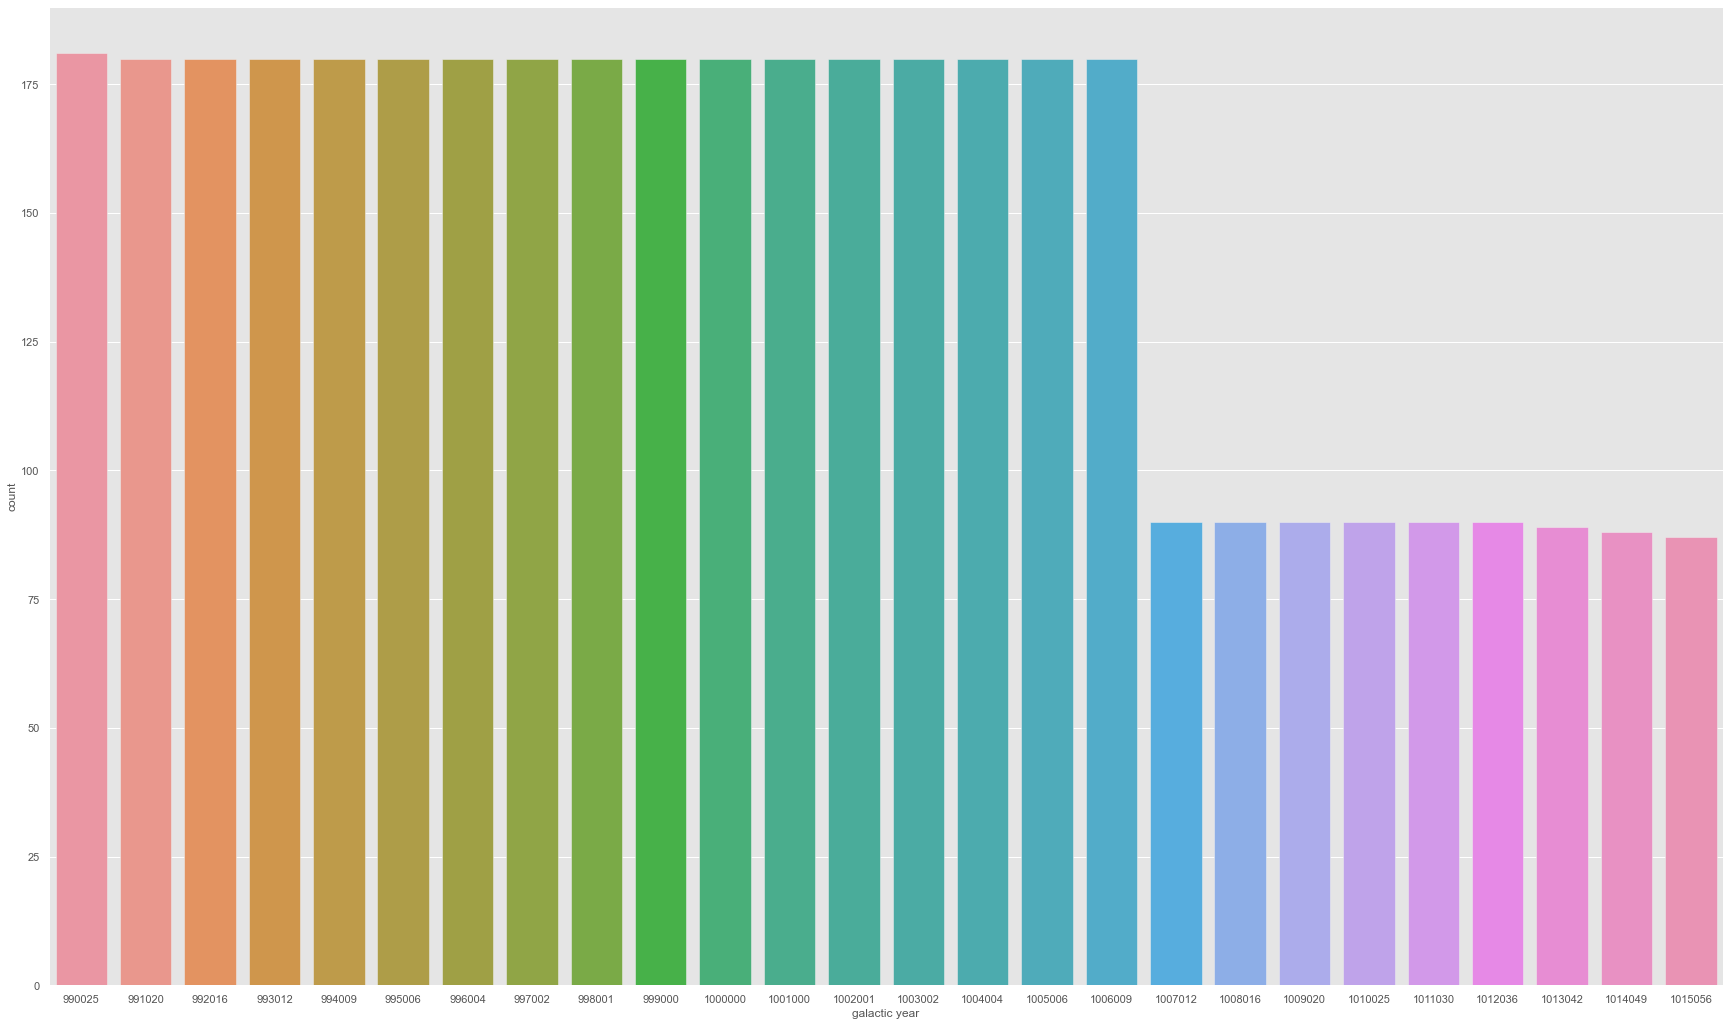

In [18]:
plt.figure(figsize = (30,18))
sns.countplot(x=df_train['galactic year'])

<AxesSubplot:xlabel='galactic year', ylabel='count'>

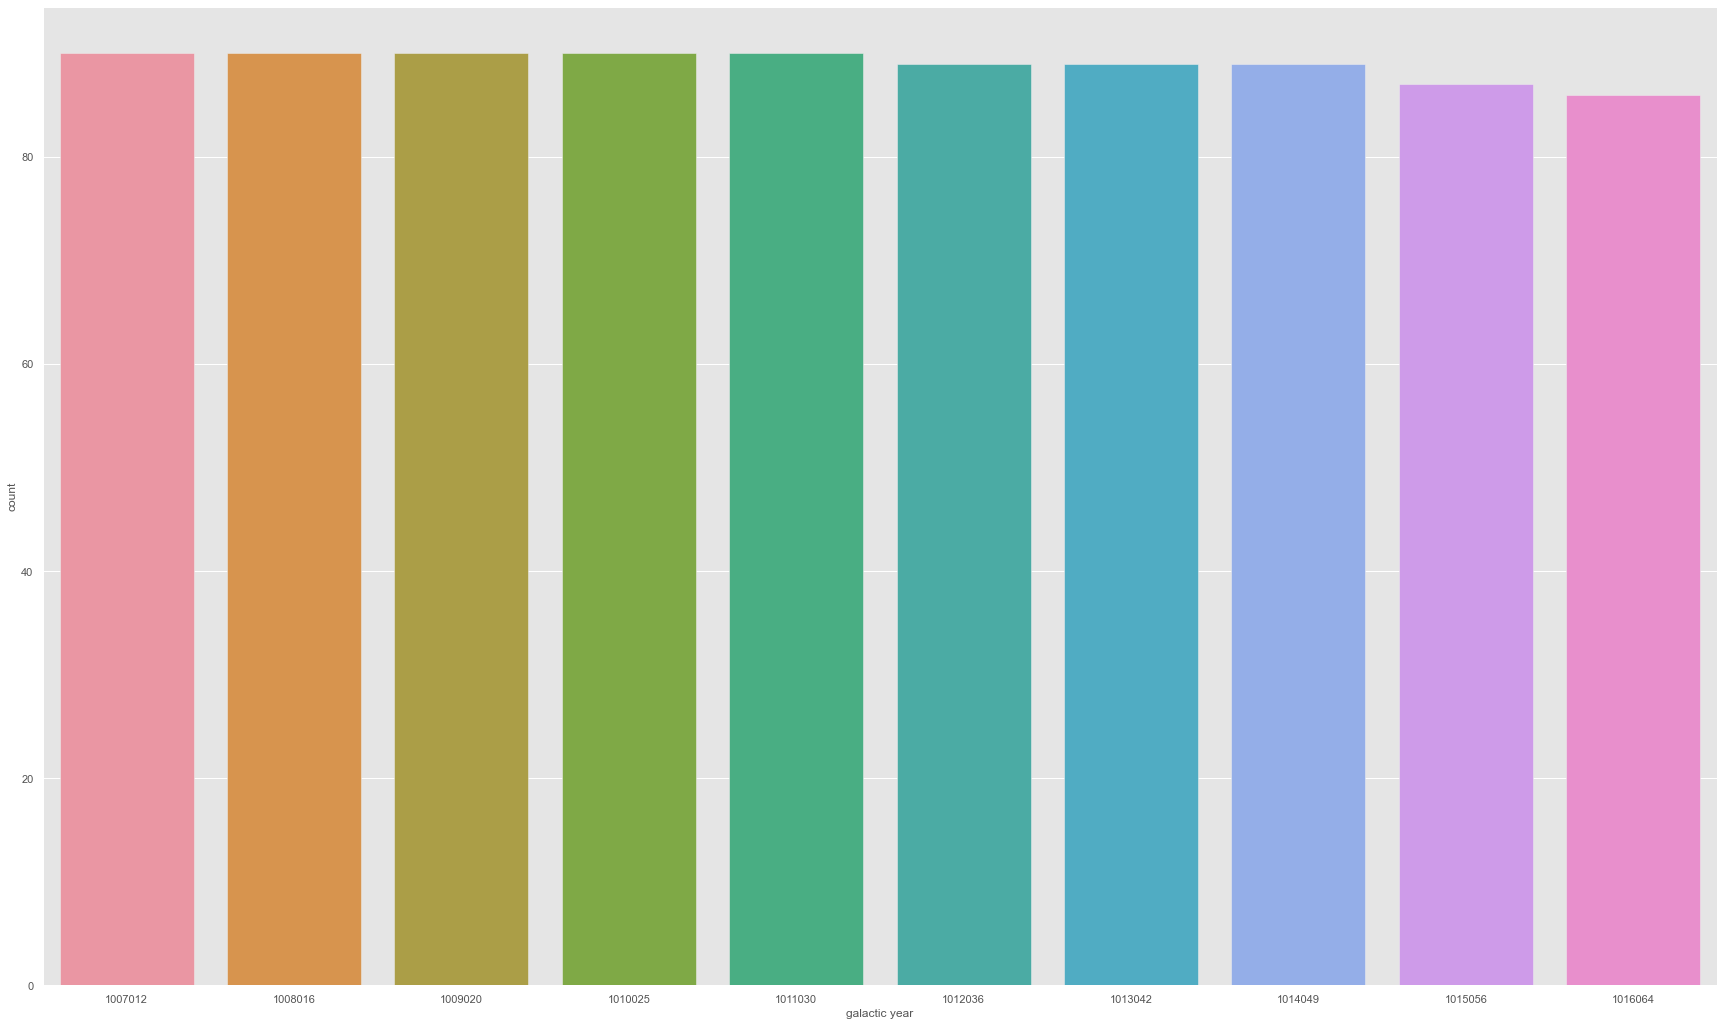

In [19]:
plt.figure(figsize = (30,18))
sns.countplot(x=df_test['galactic year'])

<Figure size 2160x2016 with 0 Axes>

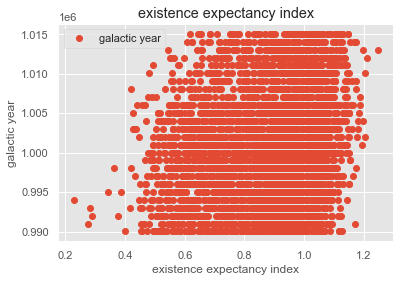

In [20]:
plt.figure(figsize = (30,28))
df_train.plot(x='existence expectancy index', y='galactic year', style='o')  
plt.title('existence expectancy index')  
plt.xlabel('existence expectancy index')  
plt.ylabel('galactic year')  
plt.show()

<Figure size 2160x2016 with 0 Axes>

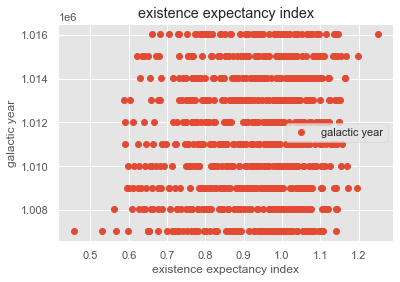

In [21]:
plt.figure(figsize = (30,28))
df_test.plot(x='existence expectancy index', y='galactic year', style='o')  
plt.title('existence expectancy index')  
plt.xlabel('existence expectancy index')  
plt.ylabel('galactic year')  
plt.show()

### Distribution of "Gross income per capita" for both datasets

<AxesSubplot:xlabel='Gross income per capita', ylabel='Density'>

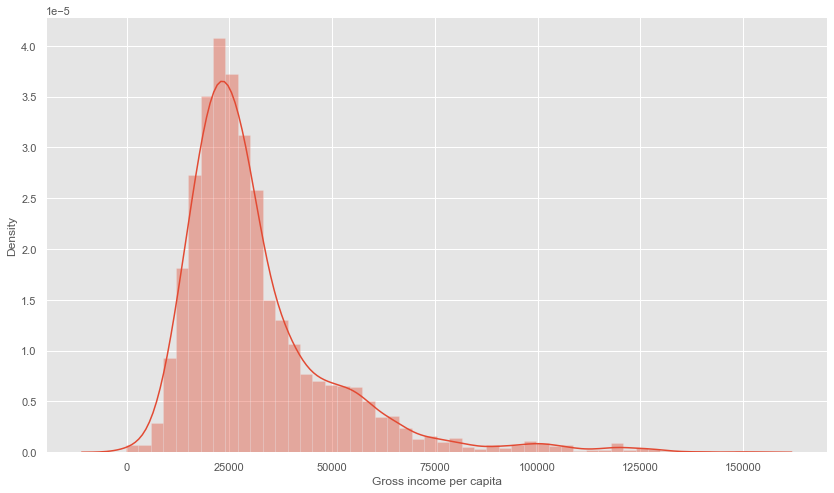

In [22]:
import seaborn as seabornInstance
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(df_train['Gross income per capita'])

<AxesSubplot:xlabel='Gross income per capita', ylabel='Density'>

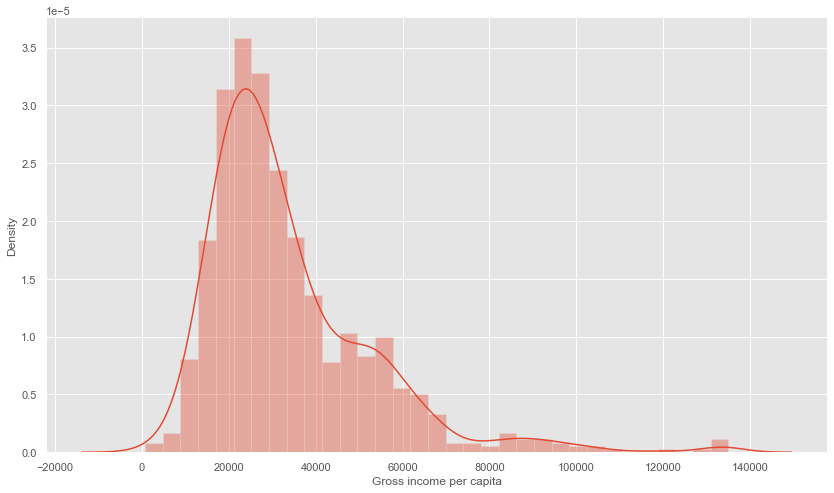

In [23]:
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(df_test['Gross income per capita'])

### Distribution of "Income Index" for both datasets

<AxesSubplot:xlabel='Income Index', ylabel='Density'>

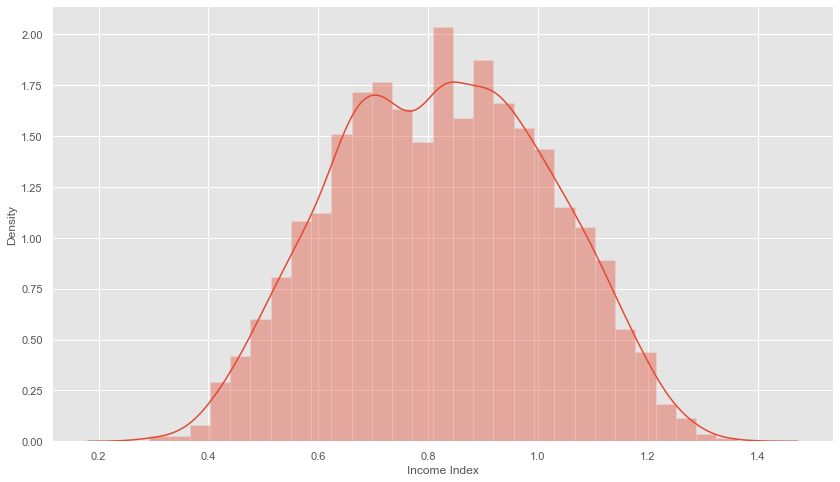

In [24]:
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(df_train['Income Index'])

<AxesSubplot:xlabel='Income Index', ylabel='Density'>

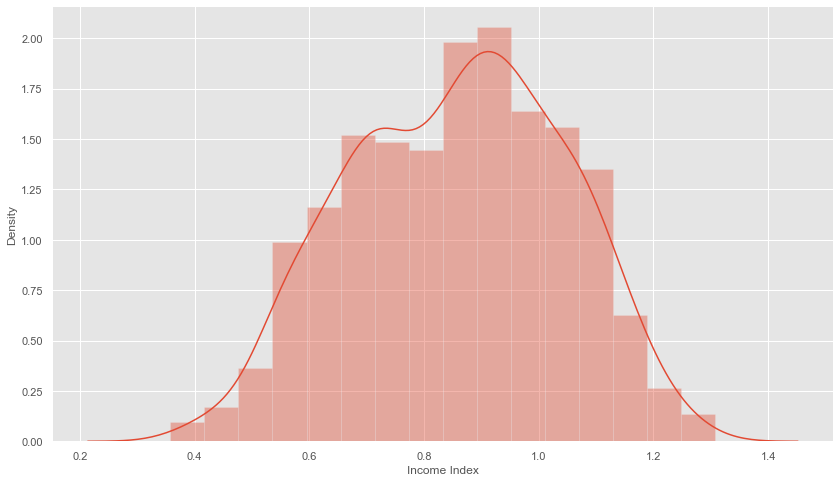

In [25]:
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(df_test['Income Index'])

### Outlier detection for "df_train" using boxplot

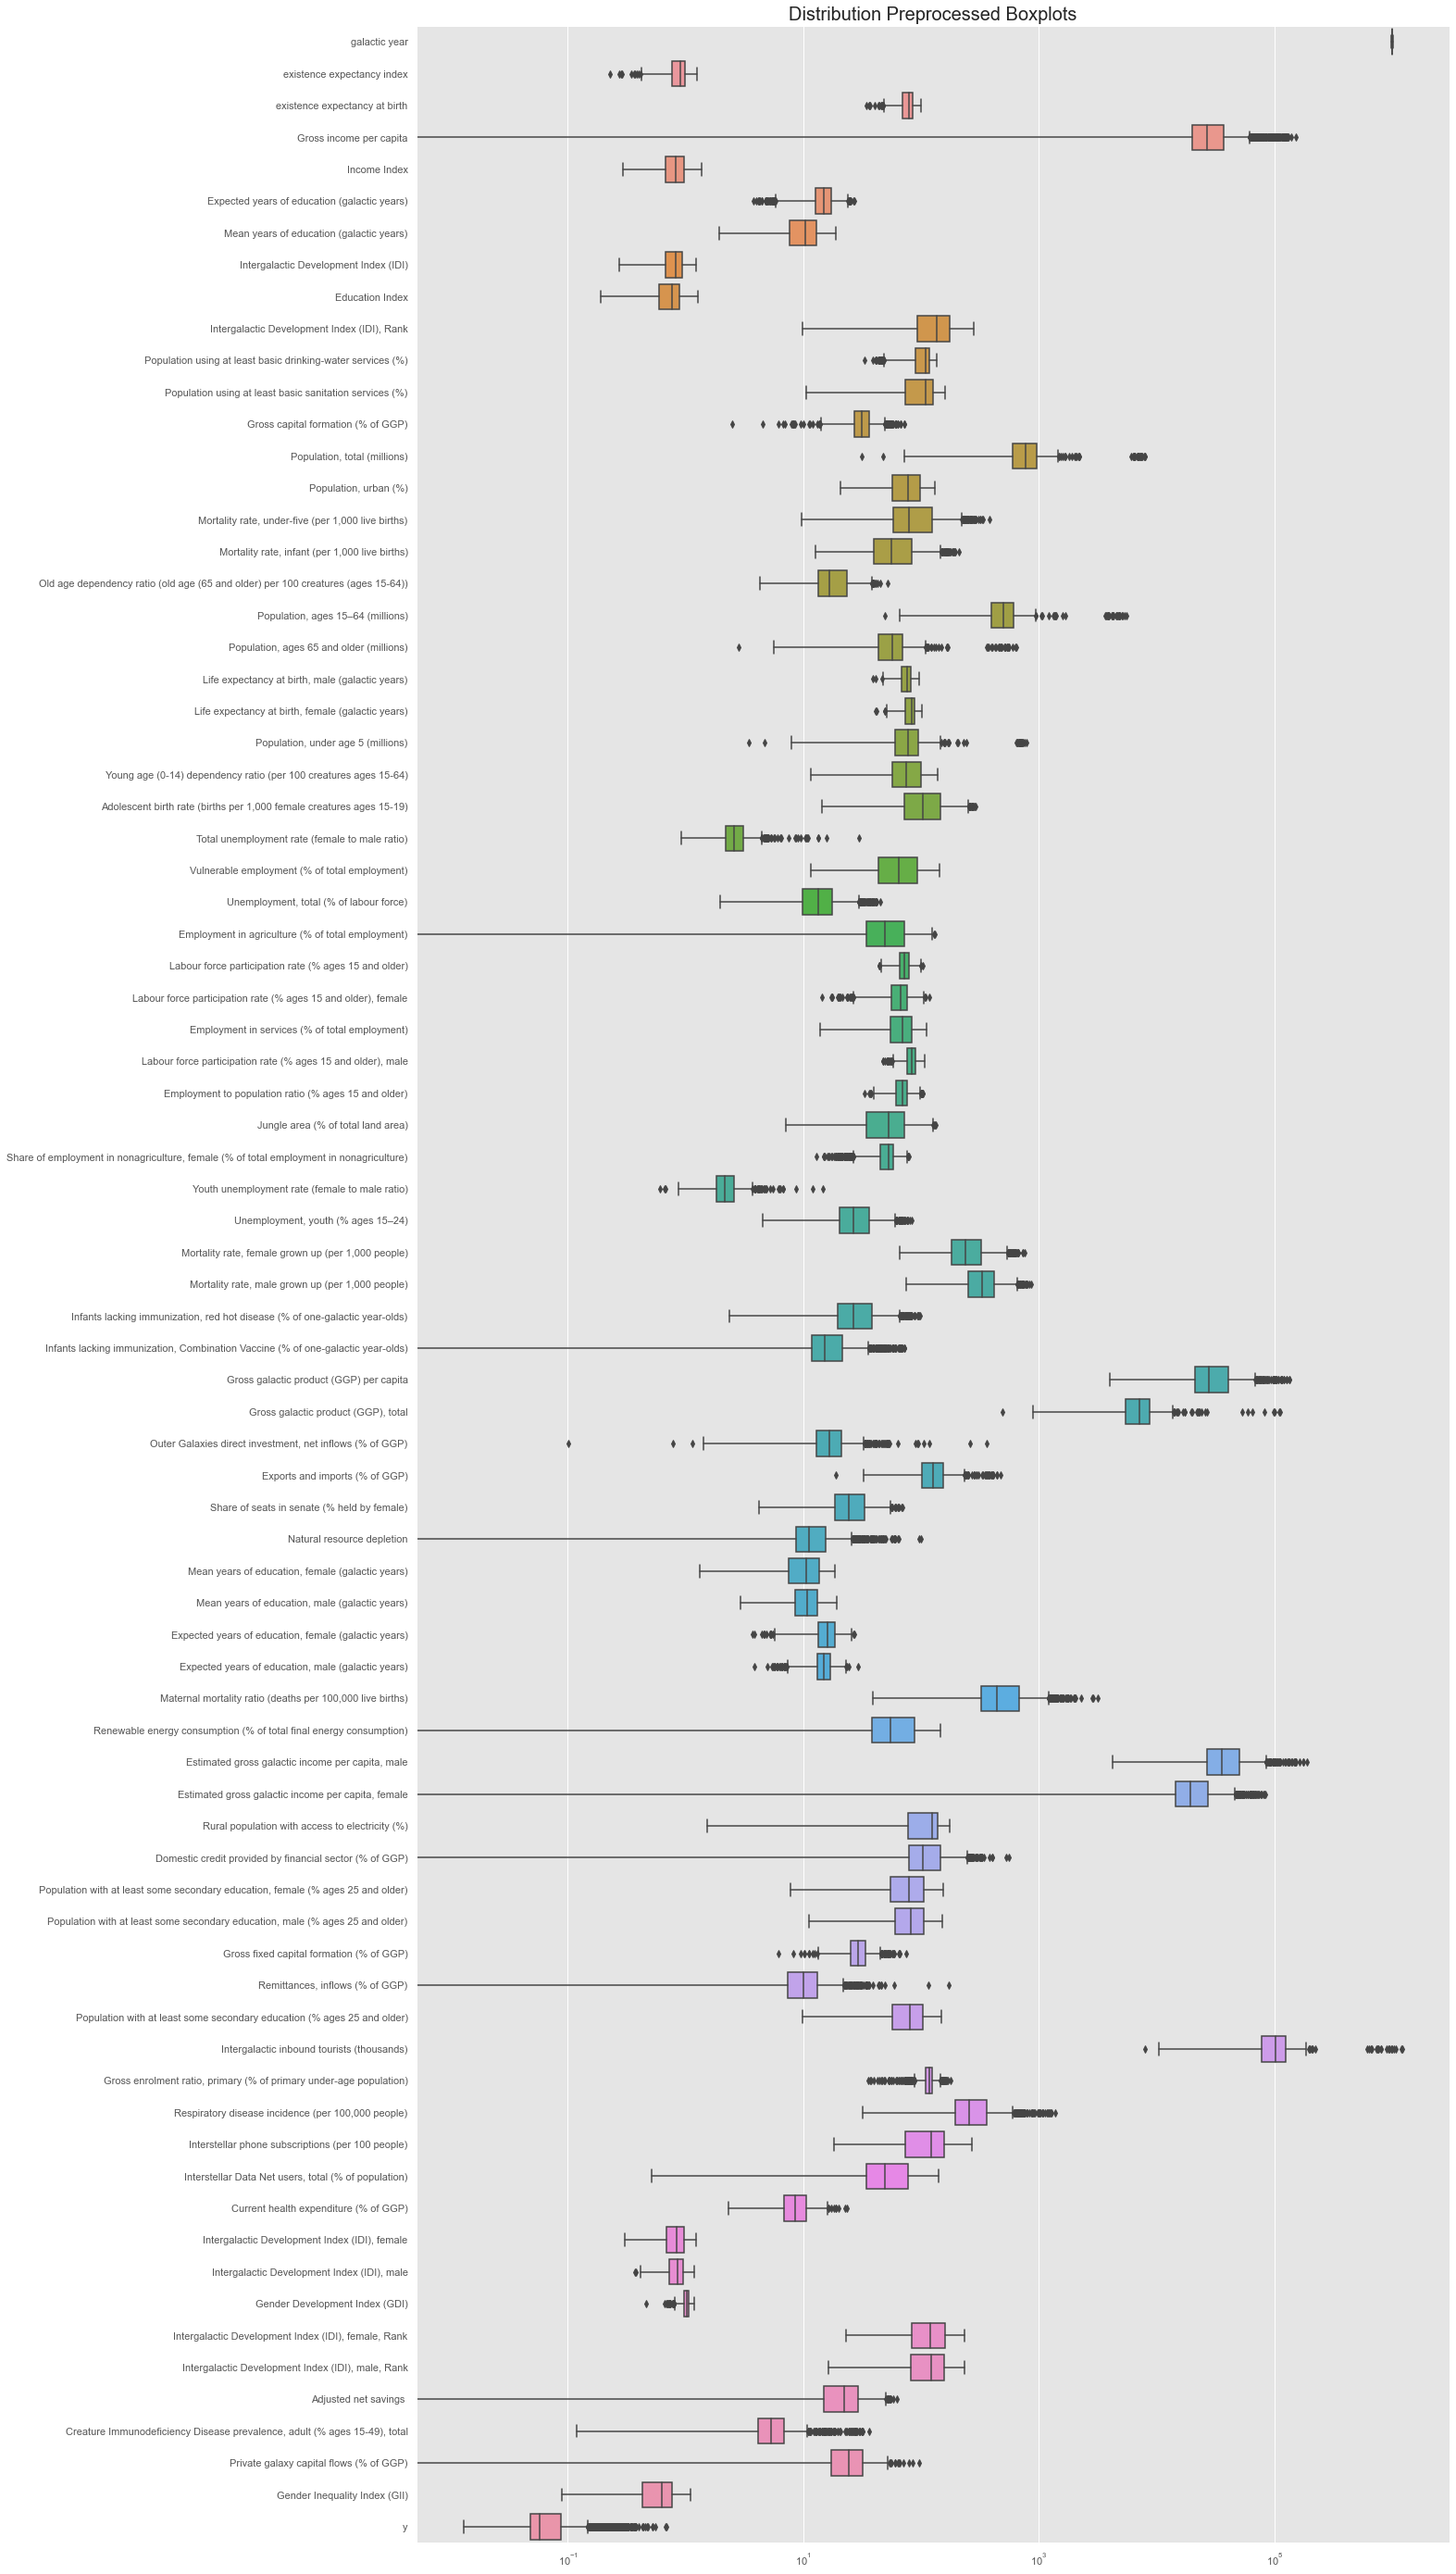

In [26]:
plt.figure(figsize = (20,50))
ax = sns.boxplot(data=df_train, orient="h")
ax.set_title('Distribution Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

### Outlier detection for "df_test" using boxplot

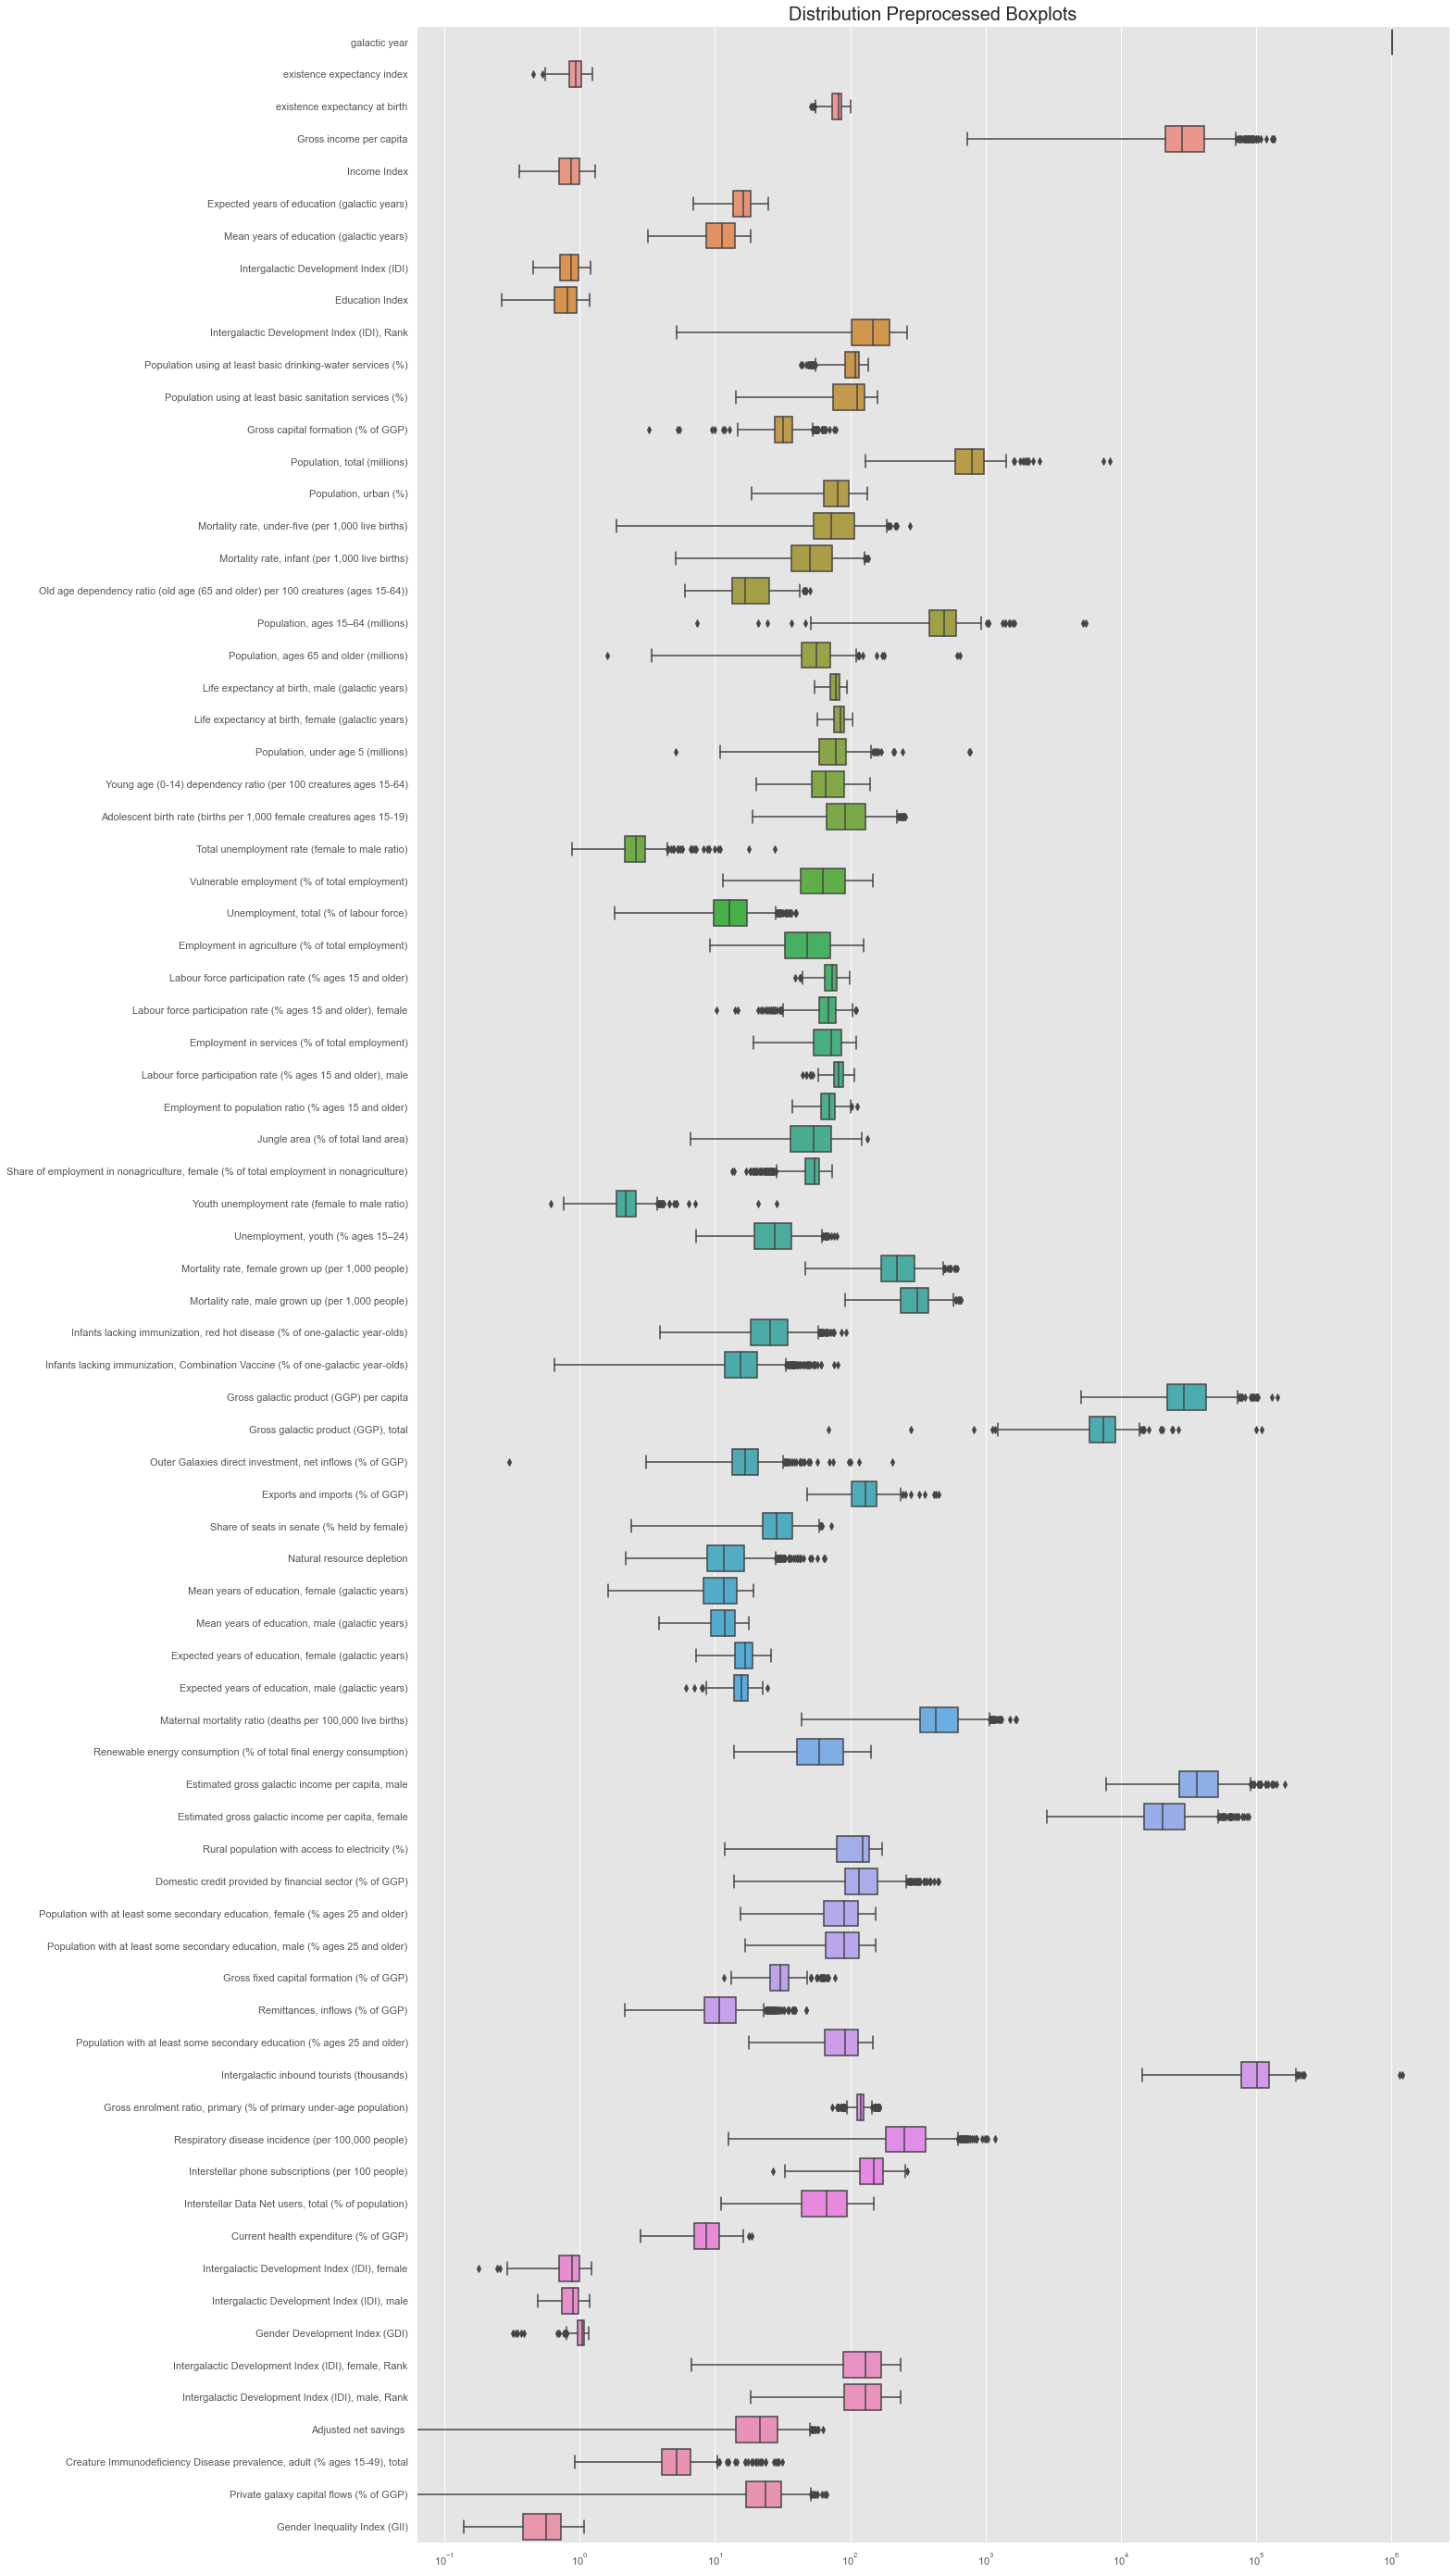

In [27]:
plt.figure(figsize = (20,50))
ax = sns.boxplot(data=df_test, orient="h")
ax.set_title('Distribution Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

### Distribution of "Gross capital formation (% of GGP)"

<Figure size 1008x576 with 0 Axes>

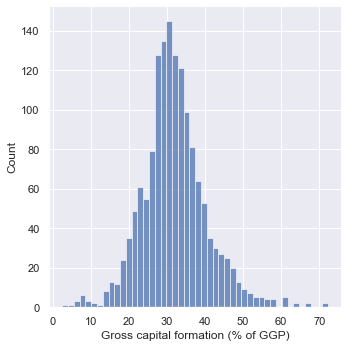

In [28]:
plt.figure(figsize = (14,8))
sns.set_theme(style="darkgrid")
sns.displot(
    df_train, x="Gross capital formation (% of GGP)"    
)

### Data Cleaning

In [29]:
df_train = df_train[[f for f in df_train.columns if f in df_train.iloc[:,0:11].columns or f=='y']]
df_test = df_test.iloc[:,0:11]

In [30]:
display(df_train.head(), df_test.head())

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,0.154247


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank"
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069


In [31]:
def data_cleaning(data, pct_threshold=0.5): 
    
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type != 'object':
            c_min = data[col].min()
            c_max = data[col].max()
            if 'int' in str(col_type): 
                if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    data[col] = data[col].astype(np.uint8)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    data[col] = data[col].astype(np.uint16)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    data[col] = data[col].astype(np.uint32)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    data[col] = data[col].astype(np.uint64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
        
        elif col_type=='object':
            if data[col].nunique() / data[col].shape[0] < pct_threshold:  
                data[col] = data[col].astype('category') 
            else:
                continue

In [32]:
data_cleaning(df_train)

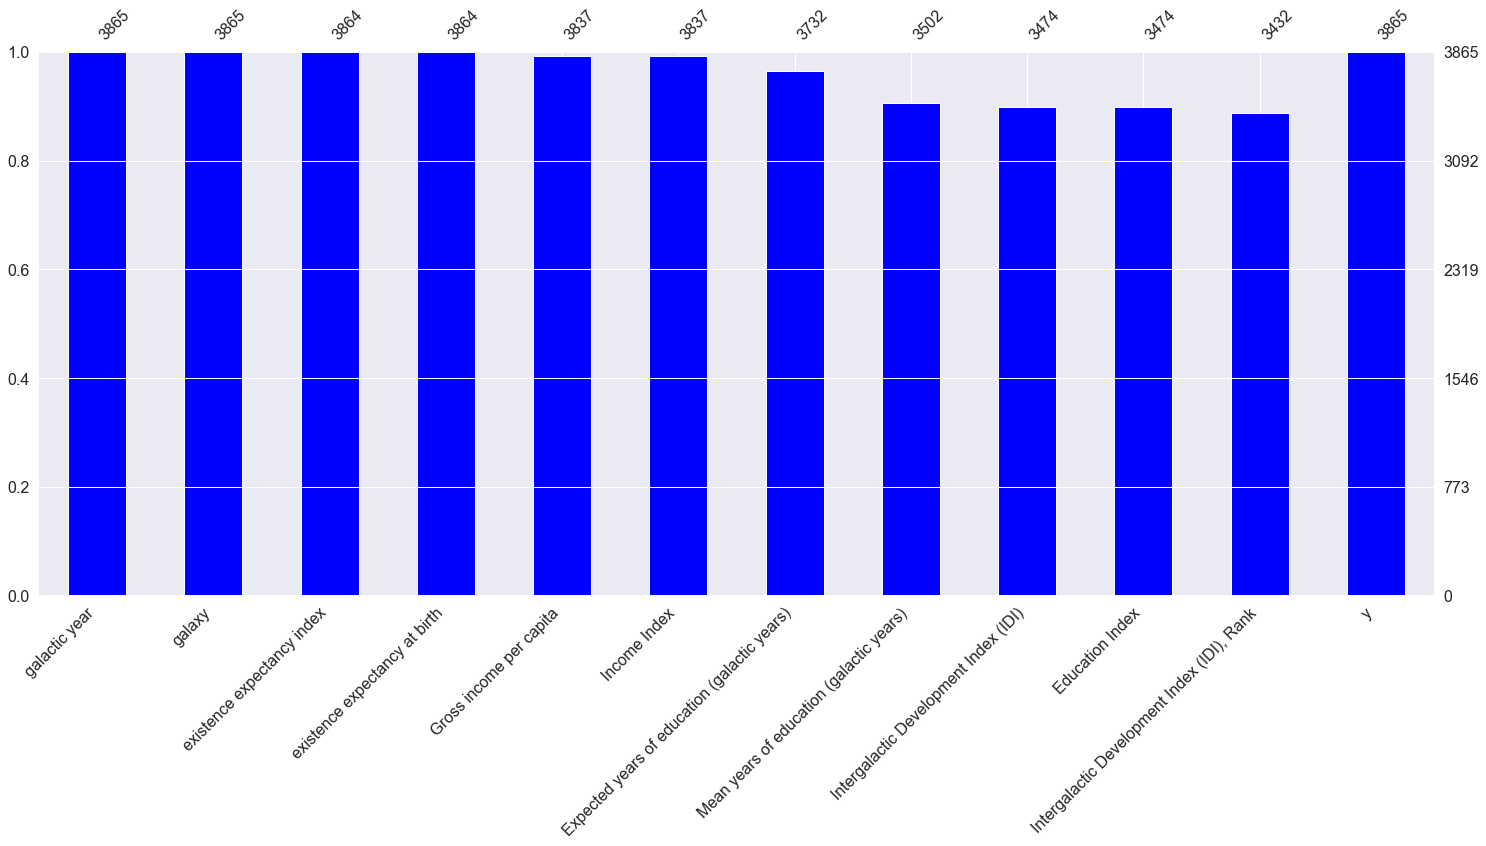

In [33]:
msn.bar(df_train, color='blue')
plt.show()

In [34]:
data_cleaning(df_test)

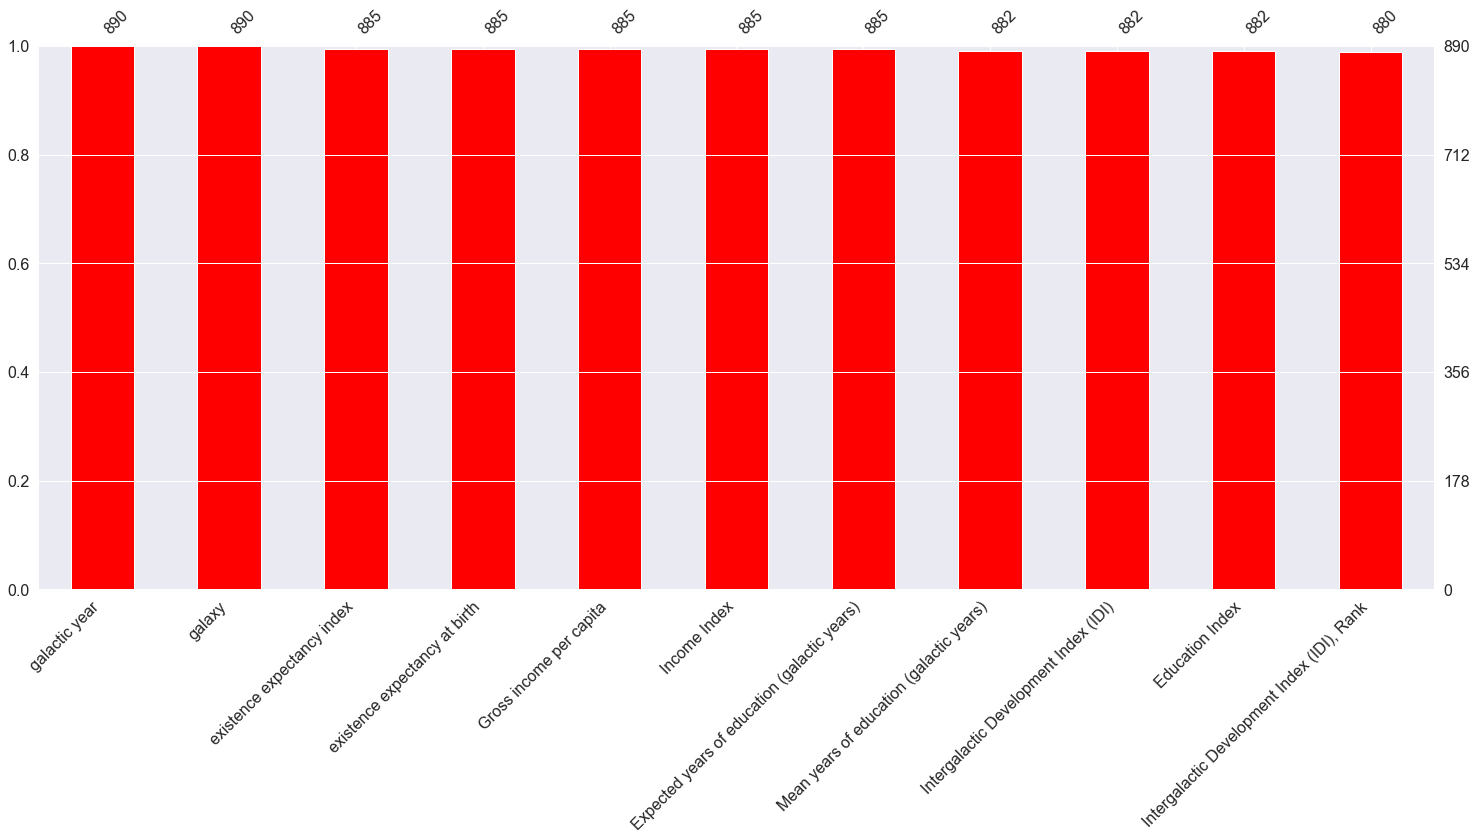

In [35]:
msn.bar(df_test, color='red')
plt.show()

In [36]:
def column_null_ratio(data):
    ratio = []
    for f in data.columns:
        n_missing = data[f].isna().sum()
        ratio.append(n_missing / data.shape[0])
    return ratio

In [37]:
display(column_null_ratio(df_train),
        column_null_ratio(df_test))

[0.0,
 0.0,
 0.000258732212160414,
 0.000258732212160414,
 0.007244501940491591,
 0.007244501940491591,
 0.034411384217335056,
 0.09391979301423027,
 0.10116429495472186,
 0.10116429495472186,
 0.11203104786545925,
 0.0]

[0.0,
 0.0,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.008988764044943821,
 0.008988764044943821,
 0.008988764044943821,
 0.011235955056179775]

## Cleaning columns' names

In [38]:
def column_names_alter(data):
    data.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', '_').replace(',', ''), inplace=True)
    return print(f'Column names cleaned: {df_train.columns}')
column_names_alter(df_train)
column_names_alter(df_test)

Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',
       'income_index', 'expected_years_of_education_(galactic_years)',
       'mean_years_of_education_(galactic_years)',
       'intergalactic_development_index_(idi)', 'education_index',
       'intergalactic_development_index_(idi)_rank', 'y'],
      dtype='object')
Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',
       'income_index', 'expected_years_of_education_(galactic_years)',
       'mean_years_of_education_(galactic_years)',
       'intergalactic_development_index_(idi)', 'education_index',
       'intergalactic_development_index_(idi)_rank', 'y'],
      dtype='object')


### Removing white spaces from columns' names

In [39]:
def values_stripper(data):
    for f in data.columns:
        if data[f].dtype == 'O':
            data[f] = data[f].str.strip()
            print(f'The unique values for {f} variable: {df_train[f].unique()}\n')
values_stripper(df_train)            
values_stripper(df_test) 

In [40]:
def duplicate_check_remove(data):
    num_duplicates = data.duplicated().sum()
    if num_duplicates > 0:
        print(f'The number of duplicate rows before: {num_duplicates}')
        data.drop_duplicates(inplace = True)
        print(f'The number of duplicate rows now: {data.duplicated().sum()}')
    else:
        print('There are no duplicate rows in the dataset.')
duplicate_check_remove(df_test)
duplicate_check_remove(df_train)

There are no duplicate rows in the dataset.
There are no duplicate rows in the dataset.


In [41]:
display(df_train['galactic_year'].value_counts().to_frame().T,  
        df_train['galaxy'].value_counts().to_frame().T)

,990025,999000,1006009,1005006,1004004,991020,1002001,1001000,1000000,1003002,998001,997002,996004,995006,994009,993012,992016,1007012,1008016,1009020,1010025,1011030,1012036,1013042,1014049,1015056
galactic_year,181,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,90,90,90,90,90,90,89,88,87


,Andromeda XII,Andromeda XIX[60],Andromeda XXII[57],Tucana Dwarf,Andromeda XXIV,Pegasus III,Pisces IV (Andromeda XIV),Eridanus II,Cassiopeia III (Andromeda XXXII),Cetus III,Phoenix Dwarf Galaxy (P 6830),Pisces V (Andromeda XVI),Boötes IV,Andromeda XXVIII,Cetus Dwarf,Andromeda XXV,Pisces II,Triangulum Galaxy (M33),Canes Venatici II Dwarf,Pisces Dwarf,IC 1613 (UGC 668),Andromeda XX,M32 (NGC 221),Pegasus Dwarf Sph (And VI),Andromeda XV,Leo IV Dwarf,NGC 147 (DDO 3),Andromeda XXIII,Andromeda VIII,Andromeda II,IC 10 (UGC 192),ESO 321-014[70],NGC 404,KKH 12,NGC 5206,Dwingeloo 2,UGC 8651 (DDO 181),Tucana III,KK98 35,Indus II,ESO 540-030 (KDG 2),NGC 2366,Draco II,Grus I,Grus II,NGC 1560,Horologium I,Horologium II,Maffei 2,FM2000 1,...,Tucana II,MB 3,Maffei 1,Hydrus I,Segue 2,HIPASS J1247-77,UGC 8833,Triangulum II,ESO 540-032,ESO 383-087 (ISG 39),NGC 247,ESO 325-11,NGC 3741,ESO 274-01[70],Large Magellanic Cloud (LMC),NGC 4214 (UGC 7278),Segue 1,Andromeda Galaxy (M31),Columba I,Andromeda XI,Andromeda XXIX,Andromeda XXVI,Andromeda V,Barnard's Galaxy (NGC 6822),Canes Venatici I Dwarf,"Cassiopeia Dwarf (Cas dSph, Andromeda VII)",Cassiopeia II (Andromeda XXX),Pisces III (Andromeda XIII),Fornax Dwarf (E356-G04),Hydra II,Andromeda I,Lacerta I (Andromeda XXXI),"Leo A (Leo III, DDO 69)","Leo I Dwarf (DDO 74, UGC 5470)","Leo II Dwarf (Leo B, DDO 93)",Leo T Dwarf,Leo V Dwarf,M110 (NGC 205),NGC 185,Andromeda IX,Andromeda III,Perseus I (Andromeda XXXIII),Andromeda XVII,Andromeda X,Sagittarius Dwarf Irregular Galaxy (SagDIG),Andromeda XXI[57],Aquarius Dwarf Galaxy (DDO 210),Pegasus Dwarf Irregular (DDO 216),"Wolf-Lundmark-Melotte (WLM, DDO 221)",NGC 5253
galaxy,26,26,26,26,26,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,...,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,17,17,17,17,17,17,1


## Check for if there are same categories in both train and test data 

In [42]:
separate_gal = [f for f in set(df_test['galaxy'].to_list()) 
            if f not in set(df_train['galaxy'].to_list())]
print(f'Test dataset contains {len(separate_gal)} values that train does not')

Test dataset contains 0 values that train does not


In [43]:
separate_year = [f for f in set(df_test['galactic_year'].to_list())  
            if f not in set(df_train['galactic_year'].to_list())]
print(f'Test dataset contains {len(separate_year)} values that train does not')

Test dataset contains 1 values that train does not


In [44]:
df_test[df_test['galaxy']=='NGC 5253']

,galactic_year,galaxy,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank


In [45]:
df_train = df_train[df_train['galaxy']!='NGC 5253']

In [46]:
df_train['galactic_year'] = df_train['galactic_year'].astype('O') 
df_test['galactic_year'] = df_test['galactic_year'].astype('O')

In [47]:
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
   
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):        
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)       
        
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True)        
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan       
        
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)  #Fill in the place that has become nan with the global mean
            
        if self.verbosity:            
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName, 
                                                                                  np.corrcoef(X[self.targetName].values,encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

### For train dataset

In [48]:
for f in df_train.columns[0:2]:
    targetc = KFoldTargetEncoderTrain(f, 'y', n_fold=5)
    df_t = targetc.fit_transform(df_train) 

Correlation between the new feature, galactic_year_Kfold_Target_Enc and, y is -0.09193567265962783.
Correlation between the new feature, galaxy_Kfold_Target_Enc and, y is 0.9595724132409045.


In [49]:
df_train = pd.concat([df_train.iloc[:,2:].drop('y', axis=1), df_train['y']], axis=1) 

In [50]:
df_train.head()

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
0,0.628418,63.12500,27109.234375,0.645996,8.242188,NaN,NaN,NaN,NaN,0.079956,0.046692,0.052582
1,0.817871,81.00000,30166.794922,0.852051,10.671875,4.742188,0.833496,0.467773,152.500,0.083862,0.057617,0.059875
2,0.659668,59.56250,8441.707031,0.499756,8.843750,5.582031,0.468994,0.363770,209.875,0.083862,0.042084,0.050446
3,0.555664,52.34375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081726,0.041016,0.049408
4,0.991211,81.81250,81033.953125,1.130859,13.796875,13.187500,0.910156,0.918457,71.875,0.083069,0.216309,0.154297


### For test dataset

In [51]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
        
    def fit(self, X, y=None):
        return self

    def transform(self,X):


        mean = self.train[[self.colNames,self.encodedName]].groupby(self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]

        
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})

        return X

In [52]:
test_targetc = KFoldTargetEncoderTest(df_t, 'galactic_year', 'galactic_year_Kfold_Target_Enc')
df_test = test_targetc.fit_transform(df_test)
test_targetc = KFoldTargetEncoderTest(df_t, 'galaxy', 'galaxy_Kfold_Target_Enc')
df_test = test_targetc.fit_transform(df_test) 

In [53]:
df_test = df_test.iloc[:,2:]

In [54]:
df_test

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc
0,0.456055,51.56250,12236.576172,0.593262,10.414062,10.695312,0.546875,0.556152,232.625,8.132189e-02,0.046109
1,0.529785,57.21875,3431.883789,0.675293,7.238281,5.312500,0.497803,0.409912,247.625,8.132189e-02,0.042839
2,0.561035,59.37500,27562.914062,0.594727,11.773438,5.937500,0.544922,0.486084,249.750,8.128052e-02,0.042839
3,0.565918,59.93750,20352.232422,0.837891,11.617188,10.070312,0.691406,0.523438,211.500,8.132189e-02,0.043467
4,0.588379,55.43750,23959.703125,0.520508,10.390625,6.375000,0.530762,0.580566,234.750,9.525050e-02,0.042113
...,...,...,...,...,...,...,...,...,...,...,...
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016064e+06,0.045176
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016064e+06,0.053049
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016064e+06,0.075626
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016064e+06,0.066907


### Imputing train dataset

In [55]:
imputer = IterativeImputer(random_state=123, n_nearest_features=15, max_iter=3693, verbose = 1)

In [56]:
df_imputed = imputer.fit_transform(df_train)
df_imputed = pd.DataFrame(df_imputed, columns=df_train.columns)

df_imputed

[IterativeImputer] Completing matrix with shape (3864, 12)
[IterativeImputer] Change: 3520.757191966776, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 6213.225629697357, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 5584.469438685923, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 2940.9158827629017, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 1812.4575176837855, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 1203.266755354334, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 838.4462182029949, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 601.9110673227858, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 440.0245665318105, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 325.14552937631515, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 241.7443967038421, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 180.36231159347582, scaled tolerance: 151.0726875 
[IterativeImp

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
0,0.628418,63.12500,27109.234375,0.645996,8.242188,5.887001,0.547955,0.442086,189.948447,0.079956,0.046692,0.052582
1,0.817871,81.00000,30166.794922,0.852051,10.671875,4.742188,0.833496,0.467773,152.500000,0.083862,0.057617,0.059875
2,0.659668,59.56250,8441.707031,0.499756,8.843750,5.582031,0.468994,0.363770,209.875000,0.083862,0.042084,0.050446
3,0.555664,52.34375,14385.099581,0.540953,9.497782,5.807682,0.488598,0.452249,210.830175,0.081726,0.041016,0.049408
4,0.991211,81.81250,81033.953125,1.130859,13.796875,13.187500,0.910156,0.918457,71.875000,0.083069,0.216309,0.154297
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,1.029297,82.81250,34310.472656,0.854980,18.578125,10.554688,0.906738,0.862793,144.875000,0.087341,0.065308,0.042328
3860,0.937988,75.87500,36899.066406,0.929688,16.156250,9.148438,0.865723,0.747559,164.750000,0.087341,0.055939,0.036713
3861,1.036133,93.56250,37002.976562,1.084961,21.062500,16.656250,0.983887,1.100586,63.718750,0.070984,0.103455,0.166260
3862,0.938965,78.25000,28180.458984,0.687500,9.390625,8.906250,0.735840,0.602539,216.750000,0.087341,0.046417,0.024185


In [57]:
df_train=df_imputed

In [58]:
df_train.isnull().sum()

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
y                                               0
dtype: int64

### Imputing test dataset

In [59]:
df_imputed = imputer.fit_transform(df_test)
df_imputed = pd.DataFrame(df_imputed, columns=df_test.columns)

[IterativeImputer] Completing matrix with shape (890, 11)
[IterativeImputer] Change: 3492.057898967193, scaled tolerance: 1016.064 
[IterativeImputer] Change: 680.8079846814604, scaled tolerance: 1016.064 
[IterativeImputer] Early stopping criterion reached.


In [60]:
df_test=df_imputed

### Checking for null values for both datasets

In [61]:
df_test.isnull().sum()

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
dtype: int64

In [62]:
display(df_train.isnull().sum(), df_test.isnull().sum())

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
y                                               0
dtype: int64

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
dtype: int64

### Checking null values with heatmap for both datasets

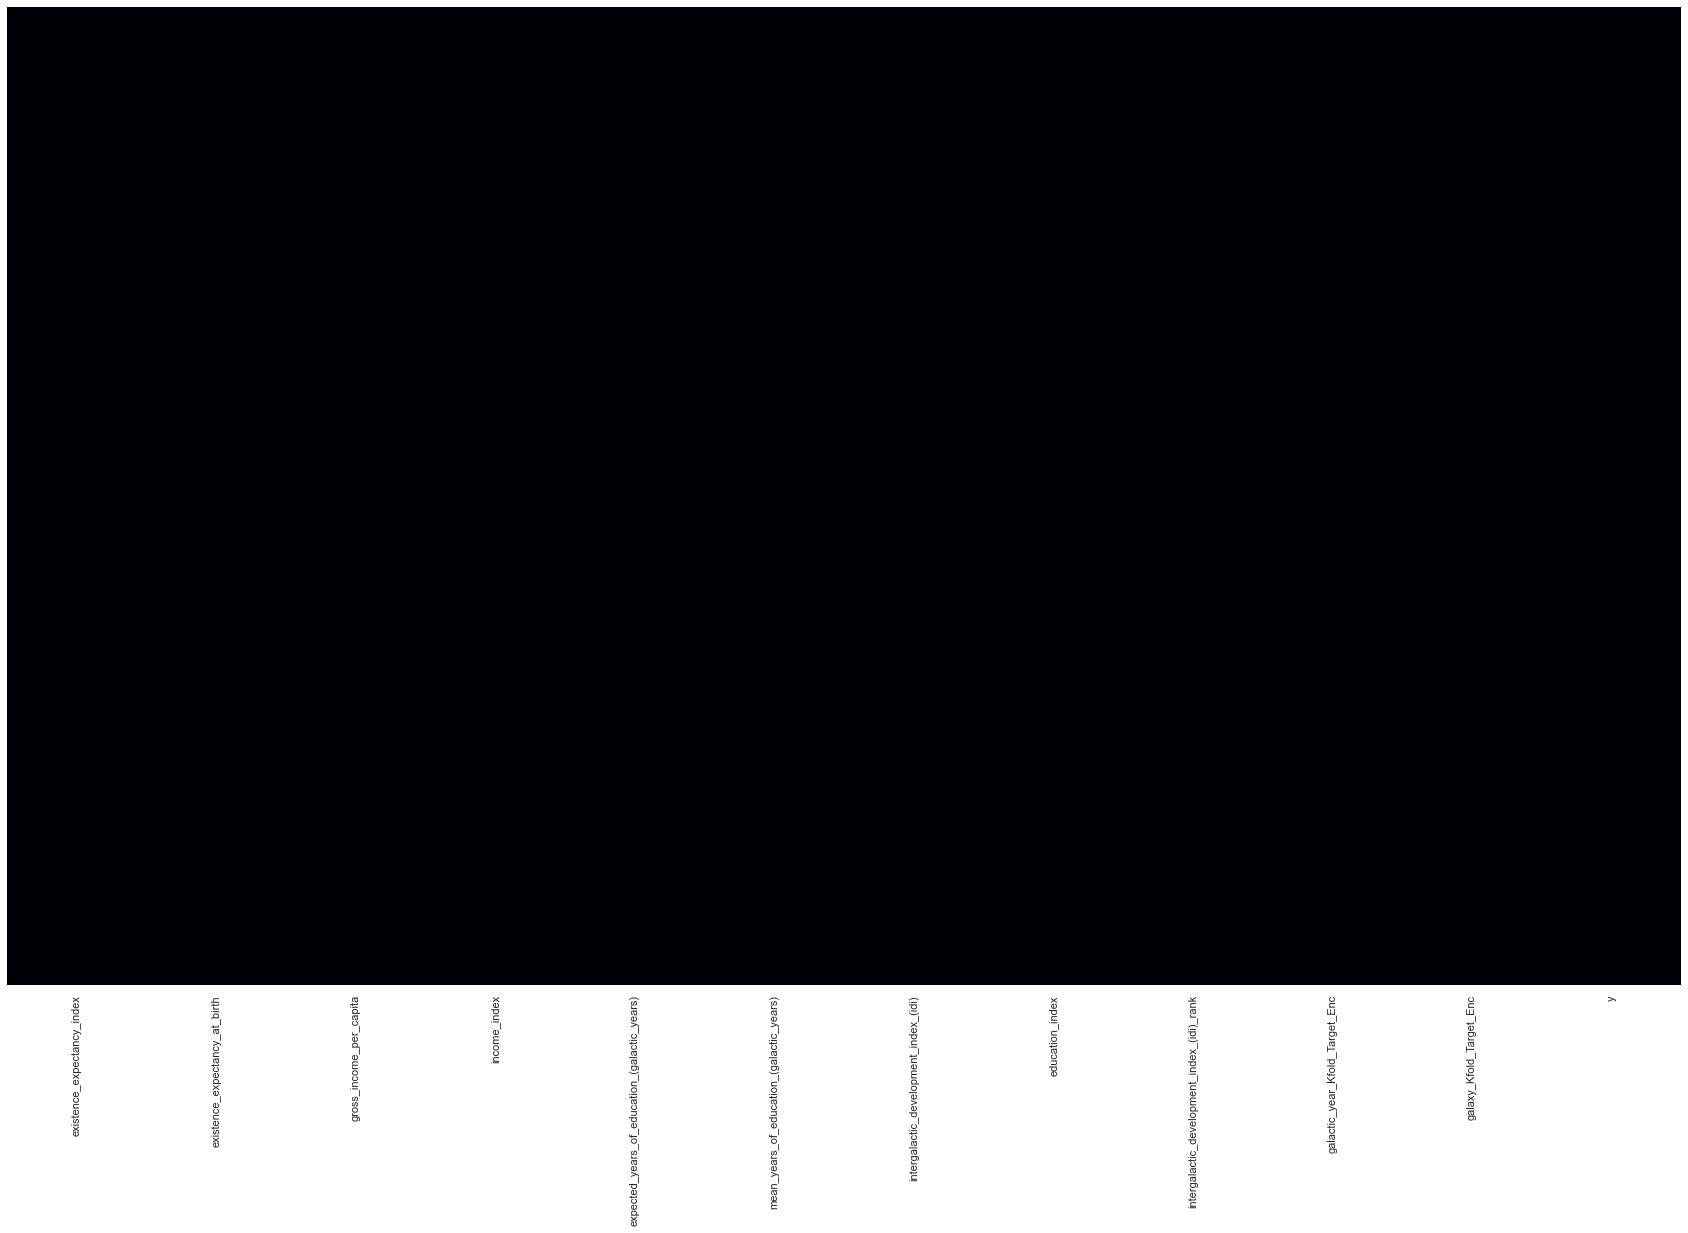

In [63]:
plt.figure(figsize = (30,18))
sns.heatmap(data = df_train.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

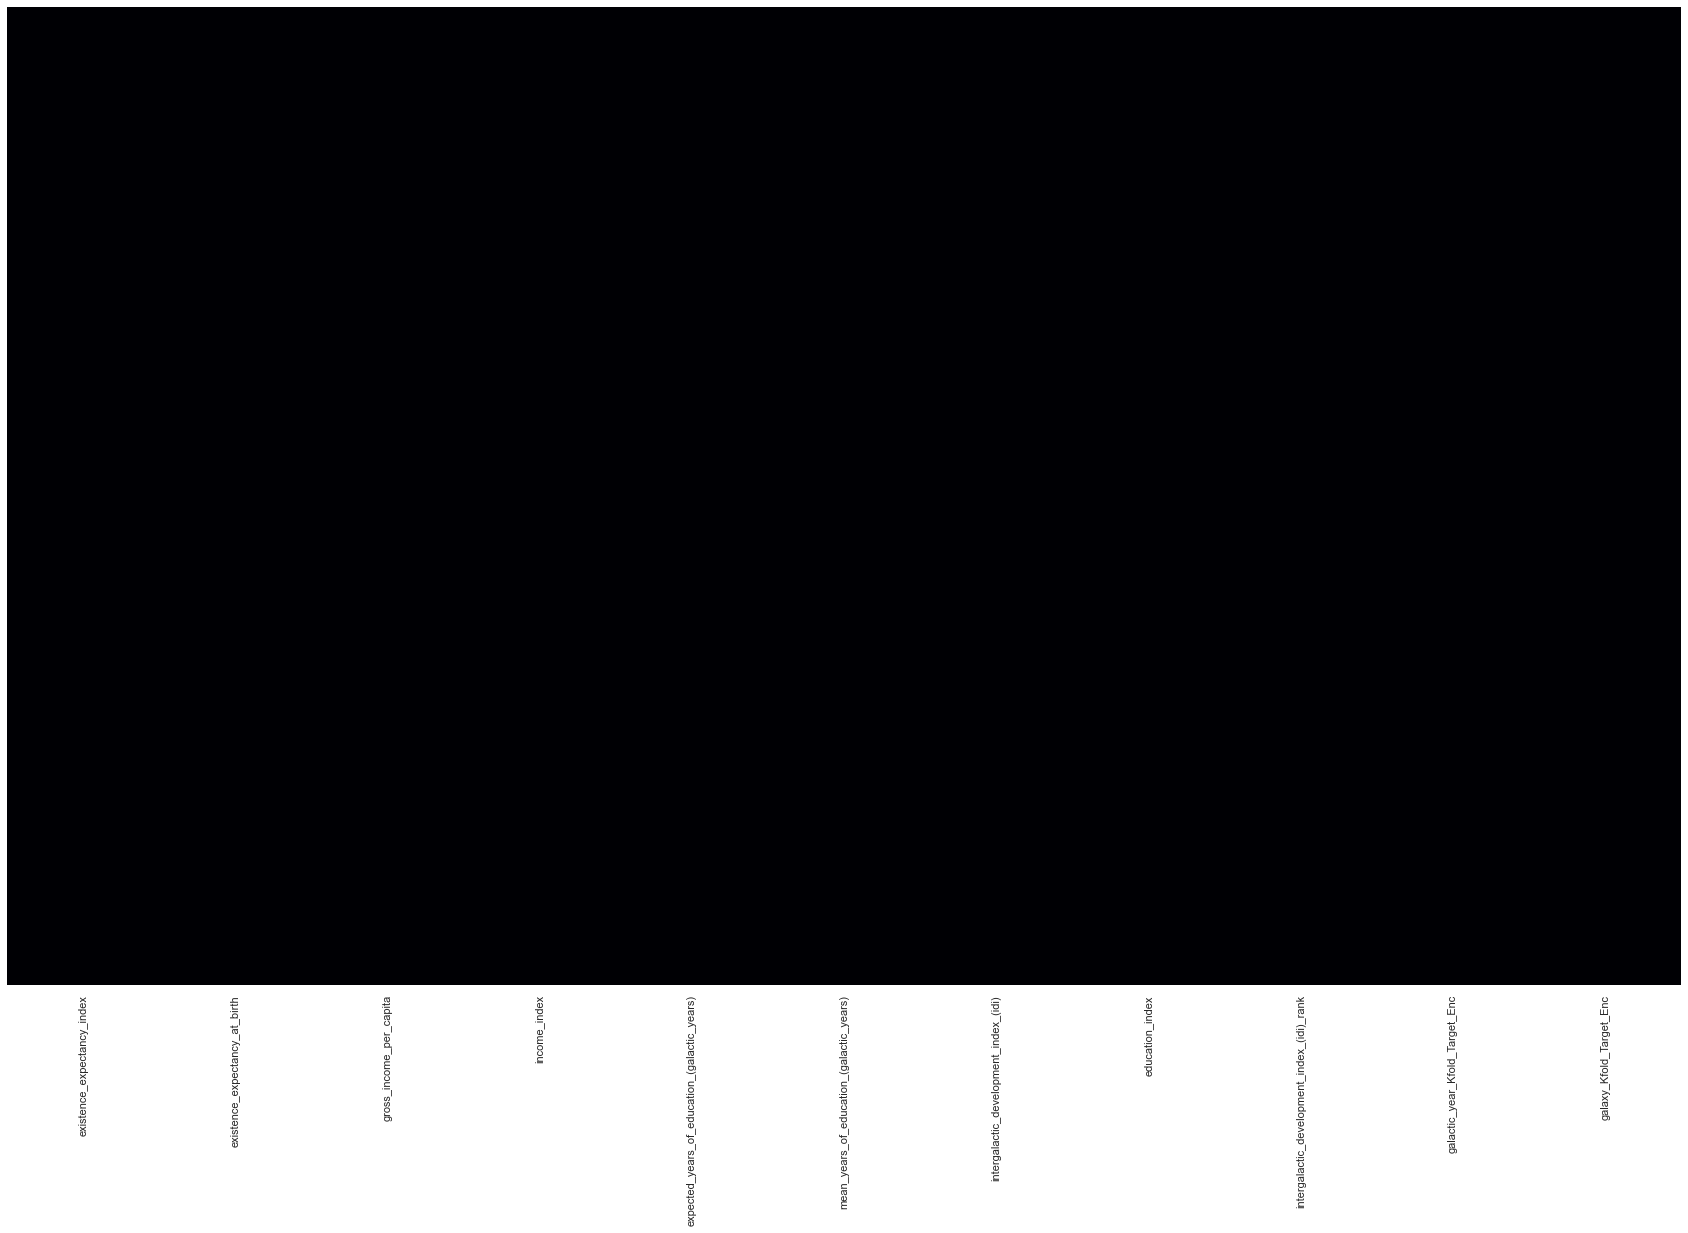

In [64]:
plt.figure(figsize = (30,18))
sns.heatmap(data = df_test.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

In [65]:
df_train.head().T

,0,1,2,3,4
existence_expectancy_index,0.628418,0.817871,0.659668,0.555664,0.991211
existence_expectancy_at_birth,63.125000,81.000000,59.562500,52.343750,81.812500
gross_income_per_capita,27109.234375,30166.794922,8441.707031,14385.099581,81033.953125
income_index,0.645996,0.852051,0.499756,0.540953,1.130859
expected_years_of_education_(galactic_years),8.242188,10.671875,8.843750,9.497782,13.796875
mean_years_of_education_(galactic_years),5.887001,4.742188,5.582031,5.807682,13.187500
intergalactic_development_index_(idi),0.547955,0.833496,0.468994,0.488598,0.910156
education_index,0.442086,0.467773,0.363770,0.452249,0.918457
intergalactic_development_index_(idi)_rank,189.948447,152.500000,209.875000,210.830175,71.875000
galactic_year_Kfold_Target_Enc,0.079956,0.083862,0.083862,0.081726,0.083069


In [66]:
df_test.head().T

,0,1,2,3,4
existence_expectancy_index,0.456055,0.529785,0.561035,0.565918,0.588379
existence_expectancy_at_birth,51.562500,57.218750,59.375000,59.937500,55.437500
gross_income_per_capita,12236.576172,3431.883789,27562.914062,20352.232422,23959.703125
income_index,0.593262,0.675293,0.594727,0.837891,0.520508
expected_years_of_education_(galactic_years),10.414062,7.238281,11.773438,11.617188,10.390625
mean_years_of_education_(galactic_years),10.695312,5.312500,5.937500,10.070312,6.375000
intergalactic_development_index_(idi),0.546875,0.497803,0.544922,0.691406,0.530762
education_index,0.556152,0.409912,0.486084,0.523438,0.580566
intergalactic_development_index_(idi)_rank,232.625000,247.625000,249.750000,211.500000,234.750000
galactic_year_Kfold_Target_Enc,0.081322,0.081322,0.081281,0.081322,0.095251


### Distribution of "Intergalactic Development Index" for train and test datasets

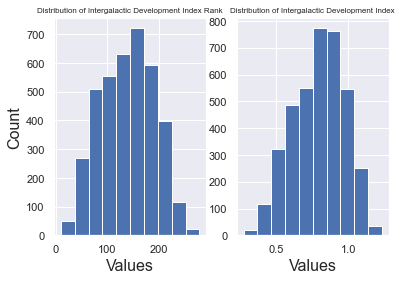

In [67]:
plt.subplot(1, 2, 2)
plt.hist(df_train['intergalactic_development_index_(idi)'])
plt.title(label = 'Distribution of Intergalactic Development Index', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)

plt.subplot(1, 2, 1)
plt.hist(df_train['intergalactic_development_index_(idi)_rank'])
plt.title(label = 'Distribution of Intergalactic Development Index Rank', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

##### Heatmap for "pearson correlation"

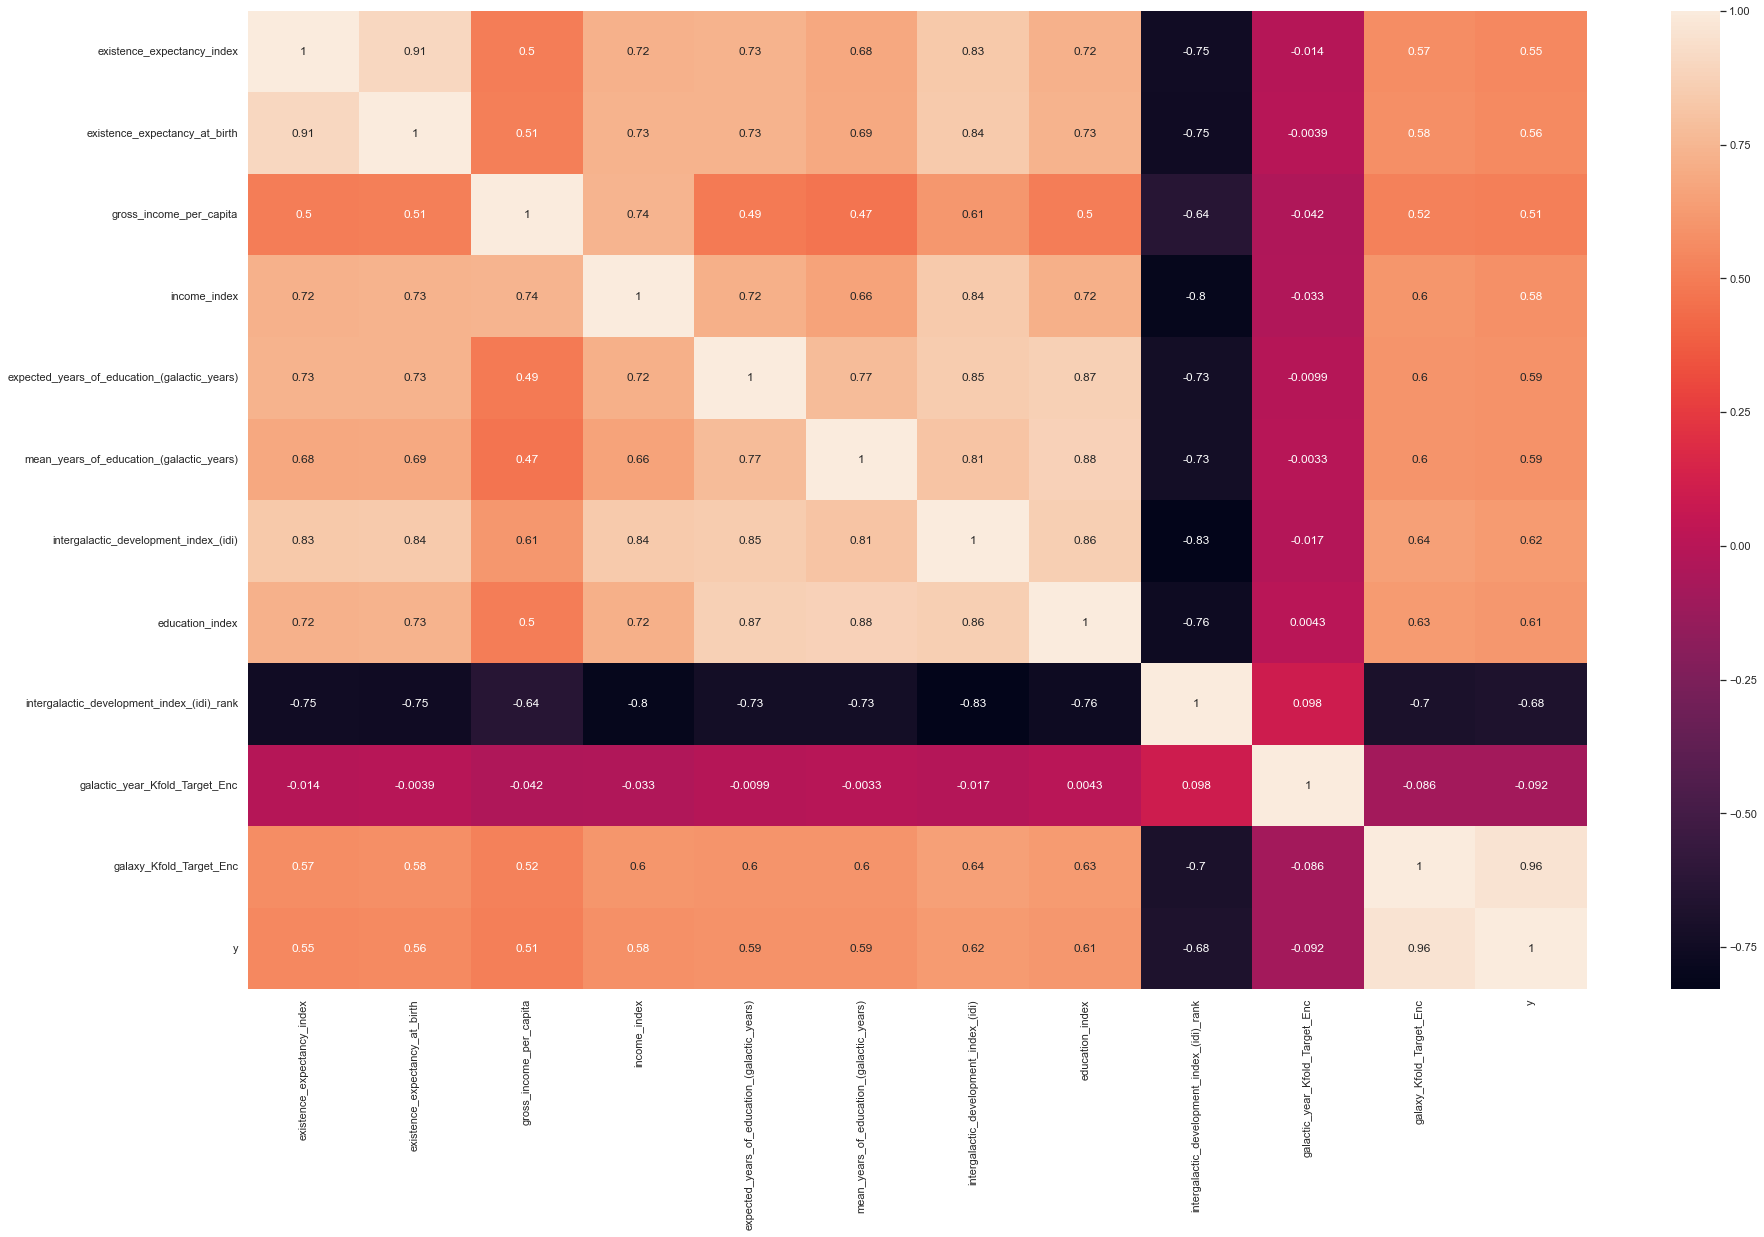

In [68]:
plt.figure(figsize = (30,18))
sns.heatmap(df_train.corr(method='pearson'), annot=True)
plt.show()

### Distributions of different features in "train dataset"

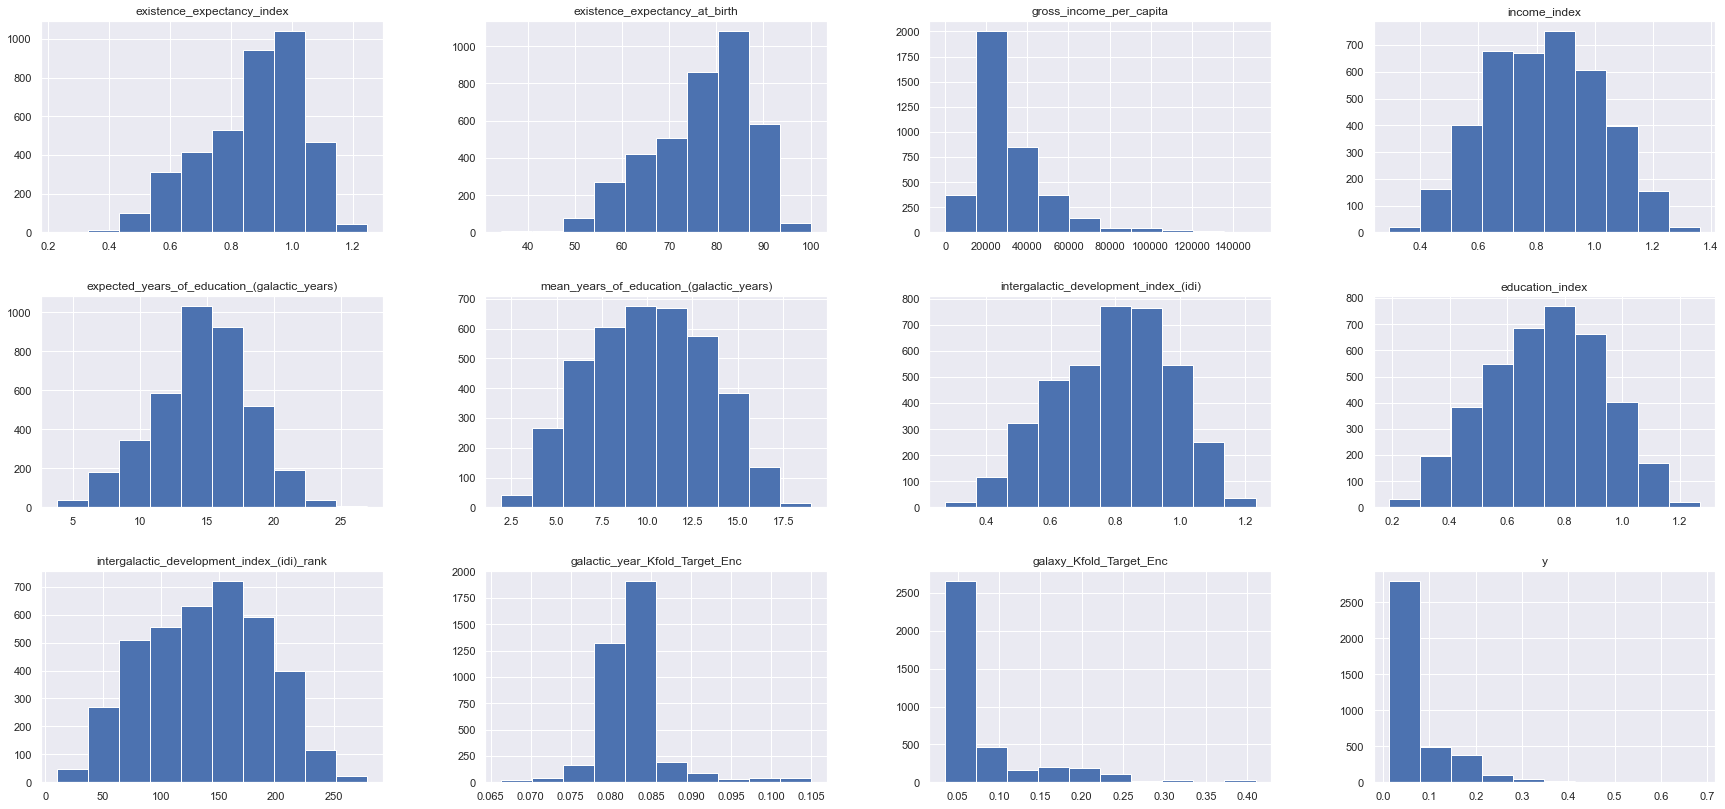

In [69]:
df_train.hist(figsize=(30,100), layout=(20,4))
plt.show()

### Distributions of different features in "test dataset"

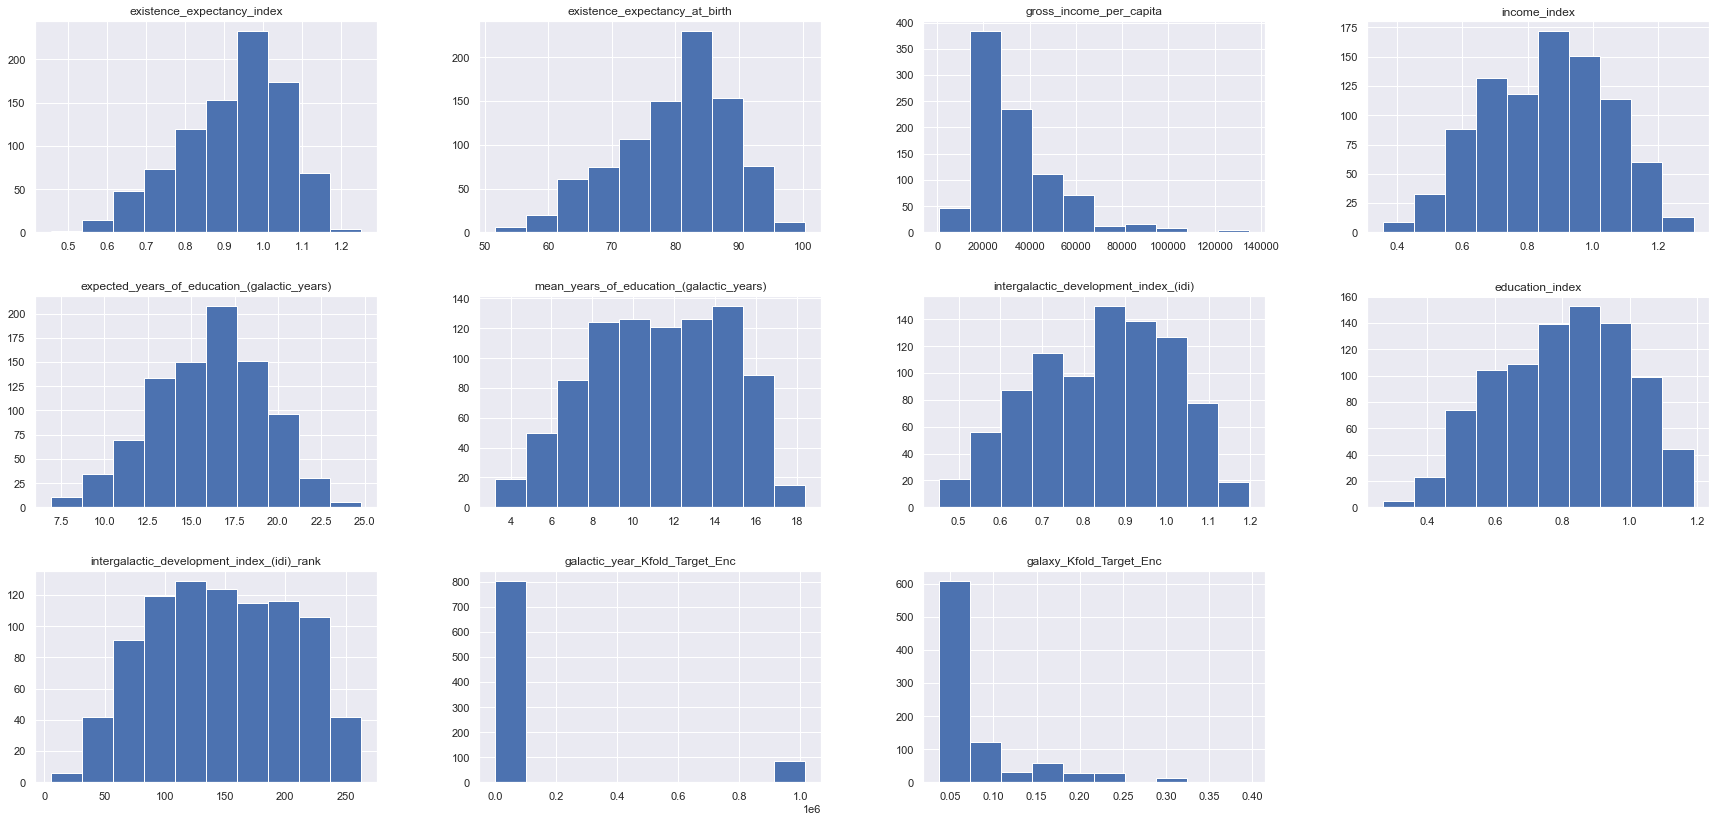

In [70]:
df_test.hist(figsize=(30,100), layout=(20,4))
plt.show()

## Modelling with XGB Regressor

### Scaling is important before modelling, for this reason, I did Robust Scaling for both datasets

In [71]:
scaler = RobustScaler()
df_train.iloc[:,:-1] = scaler.fit_transform(df_train.iloc[:,:-1])
df_train = pd.DataFrame(df_train) 

In [72]:
scaler = RobustScaler()
df_test.iloc[:,:] = scaler.fit_transform(df_test.iloc[:,:])
df_test = pd.DataFrame(df_test)

In [73]:
df_train.head()

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
0,-1.213603,-1.085470,0.032627,-0.617243,-1.466667,-0.831193,-1.007080,-1.029177,0.607179,-0.773585,-0.249079,0.052582
1,-0.388948,0.136752,0.214330,0.085798,-0.928139,-1.056764,0.085981,-0.942005,0.139165,0.433962,0.014738,0.059875
2,-1.077577,-1.329060,-1.076737,-1.116202,-1.333333,-0.891283,-1.309346,-1.294946,0.856212,0.433962,-0.360354,0.050446
3,-1.530287,-1.822650,-0.723536,-0.975639,-1.188370,-0.846822,-1.234302,-0.994689,0.868150,-0.226415,-0.386146,0.049408
4,0.365569,0.192308,3.237238,1.037068,-0.235498,0.607273,0.379439,0.587407,-0.868451,0.188679,3.846721,0.154297


In [74]:
df_test.head()

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc
0,-2.594805,-2.402516,-0.817126,-0.962393,-1.290117,-0.108578,-1.192950,-0.856796,0.899900,0.000000,-0.279976
1,-2.202597,-1.947170,-1.262501,-0.675214,-1.992492,-1.106044,-1.379406,-1.341424,1.060596,0.000000,-0.359914
2,-2.036364,-1.773585,-0.041861,-0.957265,-0.989469,-0.990228,-1.200371,-1.088997,1.083361,-0.002836,-0.359914
3,-2.010390,-1.728302,-0.406605,-0.105983,-1.024026,-0.224394,-0.643785,-0.965210,0.673586,0.000000,-0.344562
4,-1.890909,-2.090566,-0.224125,-1.217094,-1.295300,-0.909157,-1.254174,-0.775890,0.922665,0.954902,-0.377652


In [75]:
X = df_train.drop("y",axis=1)
y = df_train.y

### Train, test splitting

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=123)

In [77]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

### Checking results with scores

In [78]:
print("r2 eror rate :",r2_score(y_test,y_pred))
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 eror rate : 0.94669978747125
MAPE : 0.06578202815492785
MAE : 0.005293290254435149
RMSE 0.01466753570387276


### Predicting for test dataset

In [79]:
new_preds = xgb_model.predict(df_test)

In [80]:
df_test['new_preds'] = pd.Series(new_preds).to_frame()

<Figure size 2160x1296 with 0 Axes>

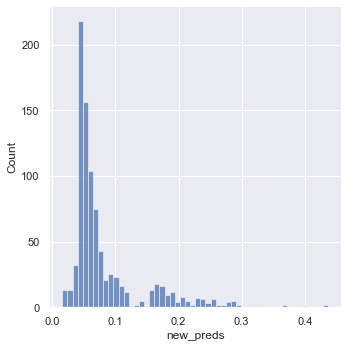

In [81]:
plt.figure(figsize = (30,18))
sns.displot(df_test['new_preds'])
plt.show()

In [82]:
# from sklearn.neighbors import KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=5)
# neigh.fit(X, y)

# KNeighborsRegressor(...)
# print(neigh.predict([[1.5]]))

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [84]:
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()

In [85]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);

In [86]:
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [87]:
from sklearn.metrics import r2_score

print(r2_score(y_test, model1_pred))
print(r2_score(y_test, model2_pred))
print(r2_score(y_test, model3_pred))

0.9108961209718465
0.0036864027770537877
0.8373026919828945


In [88]:
from sklearn.ensemble import VotingRegressor

estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators)

In [89]:
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())])

In [90]:
voting_reg_pred = voting_reg.predict(X_test)

print(r2_score(y_test, voting_reg_pred))

0.8217251177964332


In [91]:
estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators, weights=[0.3, 0.1, 0.6])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())],
                weights=[0.3, 0.1, 0.6])

In [92]:
voting_reg_pred = voting_reg.predict(X_test)
print(r2_score(y_test, voting_reg_pred))

0.9082166943744451


### Task 2

In [93]:
index = df_test['new_preds']
pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
df_test["p2"] = p2

In [94]:
dd = df_test.drop(df_test.iloc[:, 0:11],axis = 1)
dd

,new_preds,p2
0,0.045435,34.722004
1,0.046221,34.556454
2,0.044538,34.914646
3,0.040658,35.792263
4,0.045991,34.604538
...,...,...
885,0.023518,40.904739
886,0.036148,36.916504
887,0.072946,30.135365
888,0.055459,32.790863


In [95]:
dd = dd.sort_values('p2',ascending=False)
dd = dd.reset_index(drop=False)

In [96]:
dd['opt_pred']=0

In [97]:
dd

,index,new_preds,p2,opt_pred
0,88,0.015855,44.292625,0
1,57,0.019226,42.676228,0
2,138,0.020164,42.264179,0
3,202,0.020454,42.140049,0
4,41,0.020535,42.105713,0
...,...,...,...,...
885,873,0.364218,15.863626,0
886,730,0.365441,15.837643,0
887,836,0.400876,15.127930,0
888,583,0.432198,14.561845,0


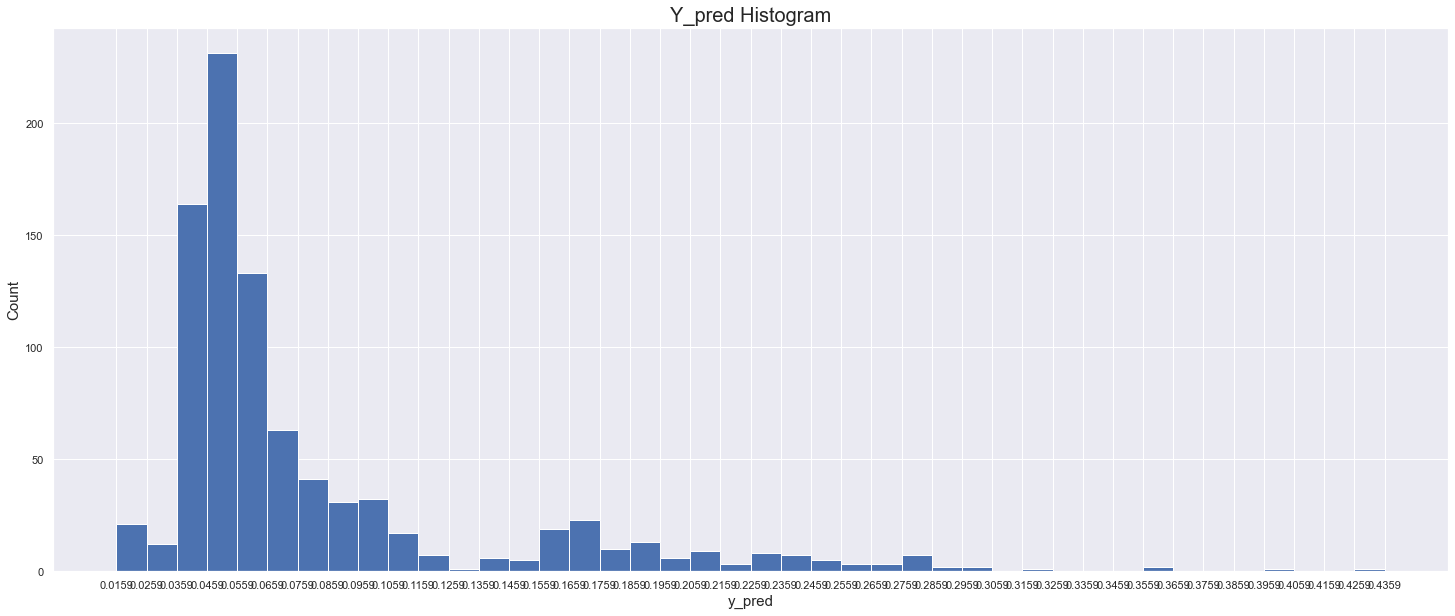

In [98]:
y_pred=dd.new_preds
x = np.arange(y_pred.min(),y_pred.max(),0.01)
plt.figure(figsize=(25,10))
plt.hist(y_pred,bins=x)
plt.title('Y_pred Histogram',fontsize=20)
plt.xlabel('y_pred',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(x)
plt.show()

In [99]:
n = 340

dd.opt_pred[:n]=100
dd.opt_pred[n:] = 0
c=100
alpha = 0.62685
for i in range(n,374):
    if c>=alpha: 
        c=c-alpha
        dd.loc[i,'opt_pred'] =c
alpha=0.067345
for i in range(374,455):
    if c>=alpha:
        c=c-alpha
        dd.loc[i,'opt_pred'] =c
    else:
        dd.loc[i,'opt_pred'] = 0
alpha = 0.03
for i in range(455,465):
    if c>=alpha: 
        c=c-alpha
        dd.loc[i,'opt_pred'] =c
alpha=0.4339465
for i in range(465,890):
    if c>=alpha: 
        c=c-alpha
        dd.loc[i,'opt_pred'] =c
    else:
        dd.loc[i,'opt_pred'] = 0

print(dd.opt_pred.sum())

49999.995680999906


In [100]:
dd['likely_inc'] = dd.opt_pred*(dd.p2**2)/1000
print(dd.opt_pred.sum())
dd.likely_inc.sum()

49999.995680999906


59382.337301907086

In [101]:
dd

,index,new_preds,p2,opt_pred,likely_inc
0,88,0.015855,44.292625,100.0,196.183667
1,57,0.019226,42.676228,100.0,182.126038
2,138,0.020164,42.264179,100.0,178.626086
3,202,0.020454,42.140049,100.0,177.578369
4,41,0.020535,42.105713,100.0,177.289111
...,...,...,...,...,...
885,873,0.364218,15.863626,0.0,0.000000
886,730,0.365441,15.837643,0.0,0.000000
887,836,0.400876,15.127930,0.0,0.000000
888,583,0.432198,14.561845,0.0,0.000000


In [102]:
print("sum",dd.opt_pred.sum())
print("left", (50000-dd.opt_pred.sum())) 
print("likely_inc",dd[dd.likely_inc<0.7]['opt_pred'].sum())

sum 49999.995680999906
left 0.004319000094255898
likely_inc 0.4922324999992711


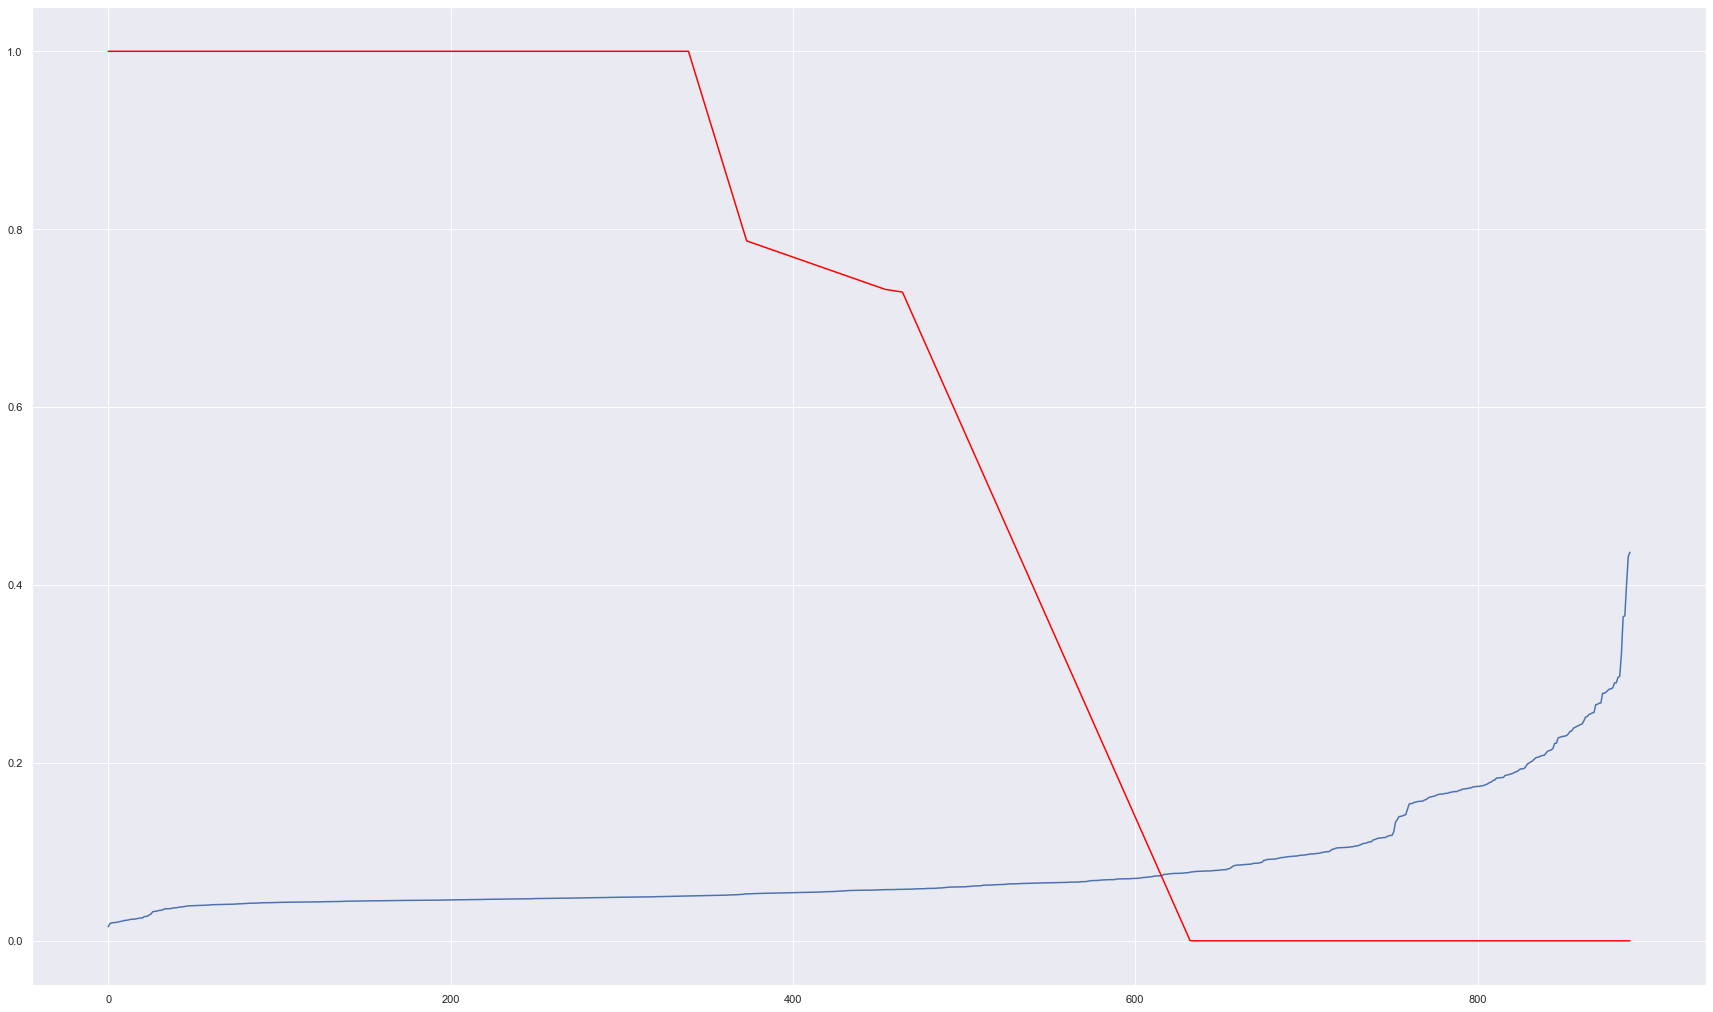

In [103]:
plt.figure(figsize = (30,18))
plt.plot(dd.new_preds)
plt.plot(dd.opt_pred/100,color="red")
plt.show()

### Submission part

In [104]:
dd=dd.sort_values('index',ascending=True)
dd=dd.reset_index(drop=True)

In [105]:
dd.rename(columns = {'new_preds':'pred'}, inplace=True)
dd

,index,pred,p2,opt_pred,likely_inc
0,0,0.045435,34.722004,100.000000,120.561755
1,1,0.046221,34.556454,100.000000,119.414844
2,2,0.044538,34.914646,100.000000,121.903247
3,3,0.040658,35.792263,100.000000,128.108606
4,4,0.045991,34.604538,100.000000,119.747400
...,...,...,...,...,...
885,885,0.023518,40.904739,100.000000,167.319775
886,886,0.036148,36.916504,100.000000,136.282825
887,887,0.072946,30.135365,8.274126,7.514067
888,888,0.055459,32.790863,75.252505,80.914558


In [106]:
dd[['index', 'pred', 'opt_pred']].to_csv('sub.csv', index=False)

In [107]:
dd

,index,pred,p2,opt_pred,likely_inc
0,0,0.045435,34.722004,100.000000,120.561755
1,1,0.046221,34.556454,100.000000,119.414844
2,2,0.044538,34.914646,100.000000,121.903247
3,3,0.040658,35.792263,100.000000,128.108606
4,4,0.045991,34.604538,100.000000,119.747400
...,...,...,...,...,...
885,885,0.023518,40.904739,100.000000,167.319775
886,886,0.036148,36.916504,100.000000,136.282825
887,887,0.072946,30.135365,8.274126,7.514067
888,888,0.055459,32.790863,75.252505,80.914558
